In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statannot import add_stat_annotation
from statsmodels.formula.api import ols
from matplotlib import rc, rcParams
import statsmodels.api as sm
import os

from scipy.ndimage import affine_transform
from scipy.stats import median_test
from scipy import stats
from scipy.stats import kruskal

import scikit_posthocs as sp

import math
from scipy.stats import shapiro

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
volfdlac = pd.read_csv('fractal_lac_data.csv')
TGCA_features = pd.read_excel(r"TCGA_LGG_GBM_radiomicFeatures_clinicalDetails.xlsx","Sheet1") #Sheet containing radiomic details

glioma = TGCA_features.merge(volfdlac,left_on = "ID",right_on = "ID")
glioma.shape
# glioma.to_excel('Glioma.xlsx', index = False)

FileNotFoundError: [Errno 2] No such file or directory: 'fractal_lac_data.csv'

## Initial Analysis

In [5]:
## glioma ##
print("Number of WT:",len(glioma[glioma["IDH_status"] == "WT"]))
print("Number of Mutants:",len(glioma[glioma["IDH_status"] == "Mutant"]))
print("Number of Methylated:",len(glioma[glioma["MGMT_promoter_status"] == "Methylated"]))
print("Number of Unmethylated:",len(glioma[glioma["MGMT_promoter_status"] == "Unmethylated"]))

Number of WT: 87
Number of Mutants: 55
Number of Methylated: 76
Number of Unmethylated: 48


In [6]:
len(glioma[glioma["IDH_status"] == "WT"]) + len(glioma[glioma["IDH_status"] == "Mutant"])

142

In [9]:
cols  = ['ncr_net_meanfd','ncr_net_medfd', 'ed_meanfd', 'ed_medfd', 'et_meanfd', 'et_medfd', 'ncr_net_meanlac','ncr_net_medlac',\
         'ed_meanlac', 'ed_medlac','et_meanlac', 'et_medlac','mean_lac', 'med_lac', 'mean_fd', 'med_fd']
median = []
for c in cols:
    m = np.median(glioma[c].values)
    median = np.append(median,m)
print(median)

[1.26112304 1.75883266 1.93121309 1.99551098 1.10403325 1.68044027
 2.15223586 1.55124957        nan        nan        nan        nan
        nan        nan 1.90071905 1.92724463]


Note: Violin plots represent the differences between the medians of the fractal dimension of each subcomponent. 

1. 

## Violin Plots to compare the medians of different molecular status of IDH and MGMT

### Preparation

In [146]:
IDH = glioma.dropna(subset='IDH_status')
save_path_violin = "/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/Final_Violin_plots/"
palette_colors = {"Mutant": "white", "WT": "white"}

### Plots

In [16]:
# **Note:**
# p-value > 0.05           ---> ns
# 0.05 > p-value > 0.01    ---> *
# 0.01 > p-value > 0.001   ---> **
# 0.001 > p-value > 0.001  ---> ***
# 0.0001 > p-value         ---> ****

#### Test

<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.857533913
1.855314537
--------------------------------------------------
The mutant data appears to be normal (p-value: 0.4966)
The wt data appears to be normal (p-value: 0.0680)
--------------------------------------------------
Median Difference:  0.002219375999999995 /  Statistic:  2384.0 /  p:  0.9732742164606993
Confidence Interval for Median Difference: [-0.01756342  0.01744095]


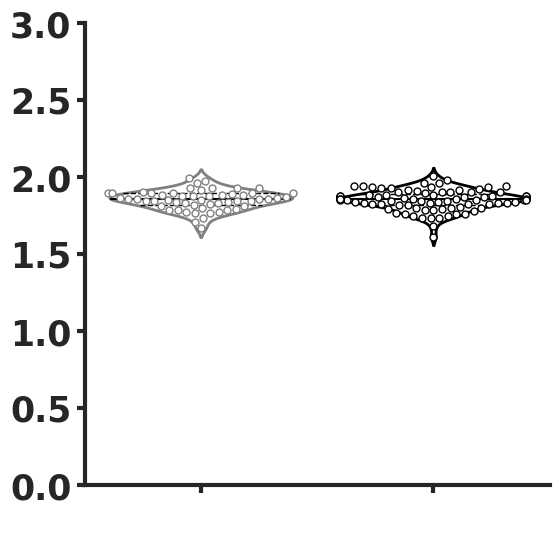

In [18]:
#FD of Whole Tumor, ["Mutant","Wildtype"]
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))


ax=sns.violinplot(x = 'IDH_status' , y = 'wh_tumour_z_meanfd',data = IDH,order=["Mutant","WT"],linewidth=2, scale ='area',
                  color="White",dodge = True , showmeans=True ,palette=palette_colors,
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")
sns.swarmplot(x = 'IDH_status' , y = 'wh_tumour_z_meanfd',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel("", size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0,3])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  
print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "IDH_status"
# y1 = "ncr_net_meanfd"
# # order = ["Mutant","WT"]
# add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],    #to annotate the graph
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results
mutant_data = IDH[IDH['IDH_status'] == "Mutant"]['wh_tumour_z_meanfd']
wt_data = IDH[IDH['IDH_status'] == "WT"]['wh_tumour_z_meanfd']

print('-'*50)
print(mutant_data.median())
print(wt_data.median())


median_difference1 = np.median(mutant_data) - np.median(wt_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(mutant_data, wt_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(mutant_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(wt_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(mutant_data, len(mutant_data), replace=True)
    wt_sample = np.random.choice(wt_data, len(wt_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#### IDH

<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.480884053
1.128704535
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0014)
The wt data appears to be normal (p-value: 0.1053)
--------------------------------------------------
IQR:  0.3141130754999999
Median Absolute Deviation:  0.18515908999999997
Median Difference:  0.352179518 /  Statistic:  3673.0 /  p:  8.306963645987483e-08
Confidence Interval for Median Difference: [0.27285096 0.46178447]


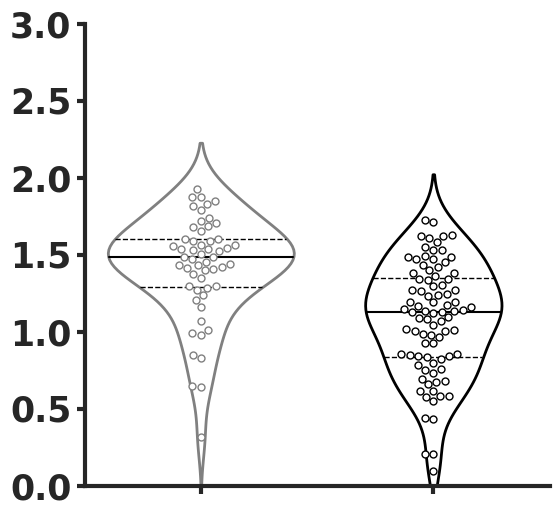

In [19]:
#FD of Necrotic Component, ["Mutant","Wildtype"]
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))


ax=sns.violinplot(x = 'IDH_status' , y = 'ncr_net_meanfd',data = IDH,order=["Mutant","WT"],linewidth=2, scale ='area',
                  color="White",dodge = True , showmeans=True ,
                  palette=palette_colors,
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")
sns.swarmplot(x = 'IDH_status' , y = 'ncr_net_meanfd',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel("", size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels(["",""], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0,3])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  
print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "IDH_status"
# y1 = "ncr_net_meanfd"
# order = ["Mutant","WT"]
# add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results
mutant_data = IDH[IDH['IDH_status'] == "Mutant"]['ncr_net_meanfd']
wt_data = IDH[IDH['IDH_status'] == "WT"]['ncr_net_meanfd']

print('-'*50)
print(mutant_data.median())
print(wt_data.median())



median_difference1 = np.median(mutant_data) - np.median(wt_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(mutant_data, wt_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(mutant_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(wt_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(mutant_data, len(mutant_data), replace=True)
    wt_sample = np.random.choice(wt_data, len(wt_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

Q1 = mutant_data.quantile(0.25)
Q3 = mutant_data.quantile(0.75)
IQR = Q3 - Q1
print('IQR: ',IQR)

median = mutant_data.median()
mad = (mutant_data - median).abs().median()
print('Median Absolute Deviation: ',mad)

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "IDH_Status_NCR_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')

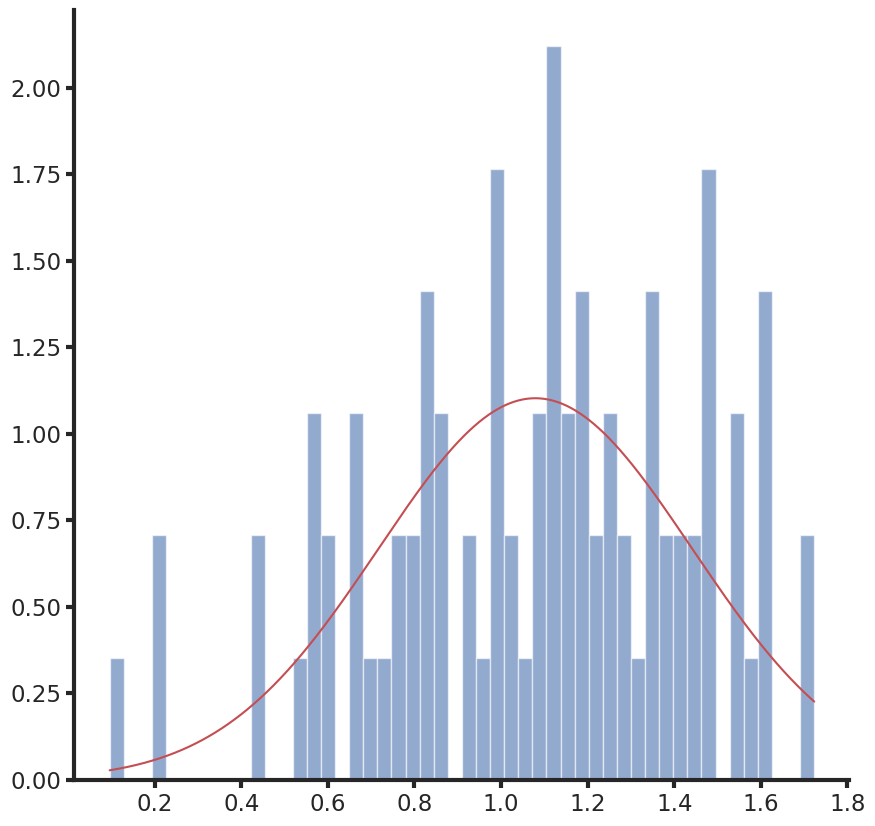

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.hist(wt_data, bins=50, density=True, alpha=0.6, color='b', label='Data Histogram')

mu = np.mean(wt_data)
sigma = np.std(wt_data)
x = np.linspace(min(wt_data), max(wt_data), 3000)

pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r', label='Normal Distribution')

142
<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.240165324
2.681740792
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0000)
The wt data appears to be not normal (p-value: 0.0000)
--------------------------------------------------
Median Difference:  -1.441575468 /  Statistic:  632.0 /  p:  1.7004661389884148e-13
Confidence Interval for Median Difference: [-1.76083714 -1.13387266]


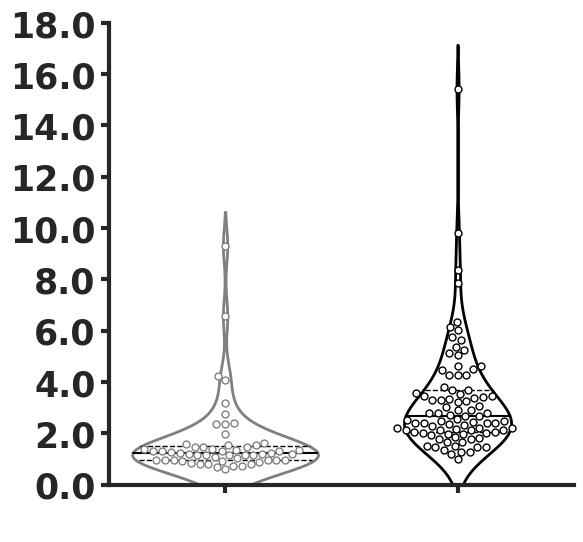

In [21]:
# Lacuranity of Necrotic Component, IDH_status
print(len(IDH))
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'ncr_net_meanlac',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'ncr_net_meanlac',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel("", size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,18])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "IDH_status"
# y1 = "ncr_net_meanlac"
# order = ["Mutant","WT"]
# add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results
mutant_data = IDH[IDH['IDH_status'] == "Mutant"]['ncr_net_meanlac']
wt_data = IDH[IDH['IDH_status'] == "WT"]['ncr_net_meanlac']

print('-'*50)
print(mutant_data.median())
print(wt_data.median())


median_difference1 = np.median(mutant_data) - np.median(wt_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(mutant_data, wt_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(mutant_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(wt_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(mutant_data, len(mutant_data), replace=True)
    wt_sample = np.random.choice(wt_data, len(wt_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "IDH_Status_NCR_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')

<Axes.ArtistList of 4 collections>
--------------------------------------------------
0.525136217
1.278996284
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0002)
The wt data appears to be not normal (p-value: 0.0000)
--------------------------------------------------
Median Difference:  -0.753860067 /  Statistic:  834.5 /  p:  6.509576328211875e-11
Confidence Interval for Median Difference: [-0.92486348 -0.62036595]


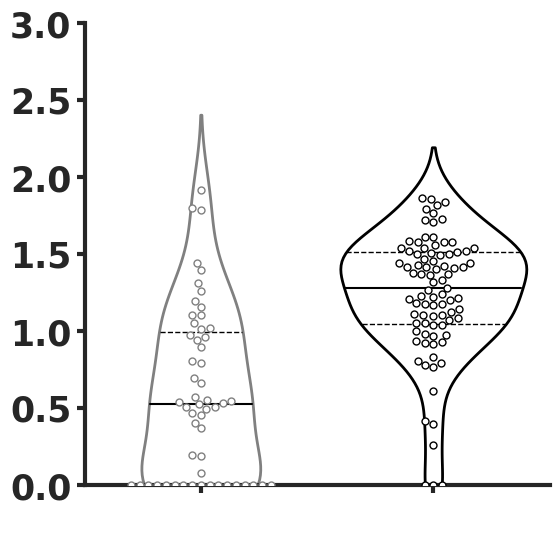

In [22]:
#FD of Enhancing Component, 
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'et_meanfd',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'et_meanfd',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "IDH_status"
# y1 = "et_meanfd"
# order = ["Mutant","WT"]
# add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results
mutant_data = IDH[IDH['IDH_status'] == "Mutant"]['et_meanfd']
wt_data = IDH[IDH['IDH_status'] == "WT"]['et_meanfd']

print('-'*50)
print(mutant_data.median())
print(wt_data.median())


median_difference1 = np.median(mutant_data) - np.median(wt_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(mutant_data, wt_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(mutant_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(wt_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(mutant_data, len(mutant_data), replace=True)
    wt_sample = np.random.choice(wt_data, len(wt_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "IDH_Status_ET_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


--------------------------------------------------
5.6320547405
1.9970563590000001
--------------------------------------------------
The mutant data appears to be normal (p-value: 0.0644)
The wt data appears to be not normal (p-value: 0.0000)
--------------------------------------------------
Median Difference:  3.6349983815 /  Statistic:  2770.0 /  p:  8.716558345491591e-11
Confidence Interval for Median Difference: [2.33363193 4.71035772]


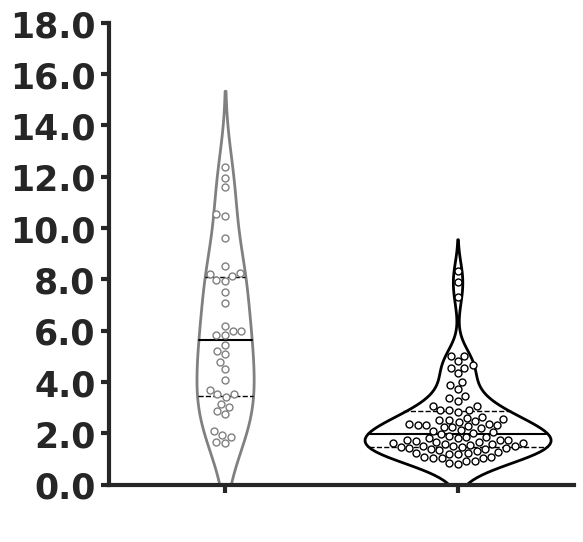

In [23]:
#Lacuranity of Enhancing Component, 
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'et_meanlac',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'et_meanlac',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim(0,18)
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  

# print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])


# x1 = "IDH_status"
# y1 = "et_meanlac"
# order = ["Mutant","WT"]
# add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results
IDH_mod = IDH.dropna(subset='et_meanlac')
mutant_data = IDH_mod[IDH_mod['IDH_status'] == "Mutant"]['et_meanlac']
wt_data = IDH_mod[IDH_mod['IDH_status'] == "WT"]['et_meanlac']

print('-'*50)
print(mutant_data.median())
print(wt_data.median())


median_difference1 = np.median(mutant_data) - np.median(wt_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(mutant_data, wt_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(mutant_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(wt_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(mutant_data, len(mutant_data), replace=True)
    wt_sample = np.random.choice(wt_data, len(wt_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "IDH_Status_ET_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.932794791
1.923493019
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0000)
The wt data appears to be not normal (p-value: 0.0000)
--------------------------------------------------
Median Difference:  0.009301772000000152 /  Statistic:  2538.0 /  p:  0.5437016108955468
Confidence Interval for Median Difference: [-0.02099476  0.03269356]


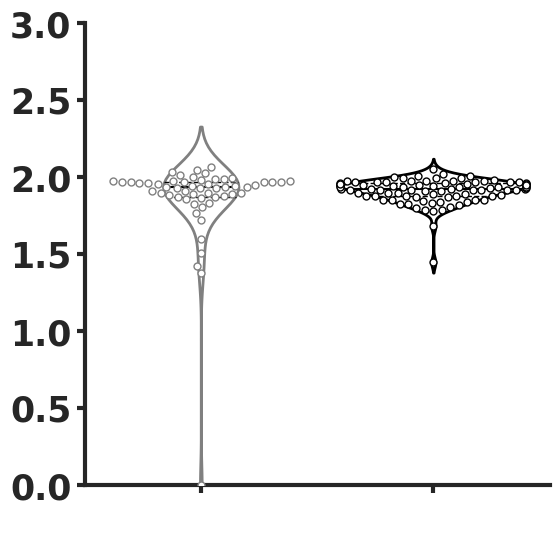

In [24]:
# FD of Edema Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'ed_meanfd',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'ed_meanfd',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "IDH_status"
# y1 = "ed_meanfd"
# order = ["Mutant","WT"]
# add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results
mutant_data = IDH[IDH['IDH_status'] == "Mutant"]['ed_meanfd']
wt_data = IDH[IDH['IDH_status'] == "WT"]['ed_meanfd']

print('-'*50)
print(mutant_data.median())
print(wt_data.median())


median_difference1 = np.median(mutant_data) - np.median(wt_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(mutant_data, wt_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(mutant_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(wt_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(mutant_data, len(mutant_data), replace=True)
    wt_sample = np.random.choice(wt_data, len(wt_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "IDH_Status_ED_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.2649266295000001
1.070617936
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0000)
The wt data appears to be not normal (p-value: 0.0000)
--------------------------------------------------
Median Difference:  0.19430869350000002 /  Statistic:  2809.0 /  p:  0.051314923658075294
Confidence Interval for Median Difference: [0.0612504  0.38660933]


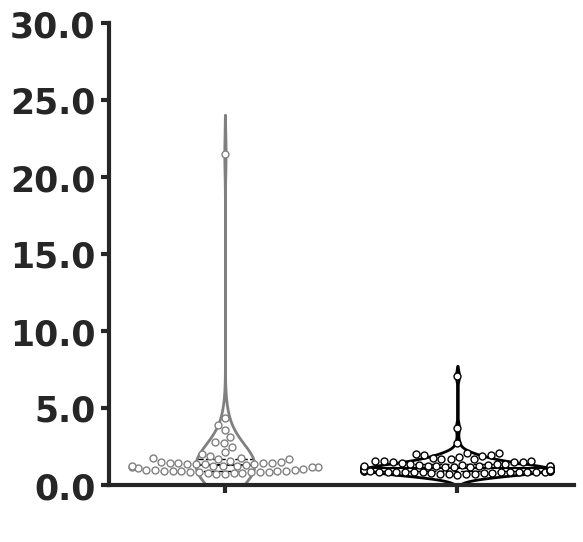

In [25]:
# Lacuranity of Edema Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'ed_meanlac',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'ed_meanlac',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,30])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])
# x1 = "IDH_status"
# y1 = "ed_meanlac"
# order = ["Mutant","WT"]
# add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results
IDH_mod = IDH.dropna(subset='ed_meanlac')
mutant_data = IDH_mod[IDH_mod['IDH_status'] == "Mutant"]['ed_meanlac']
wt_data = IDH_mod[IDH_mod['IDH_status'] == "WT"]['ed_meanlac']

print('-'*50)
print(mutant_data.median())
print(wt_data.median())


median_difference1 = np.median(mutant_data) - np.median(wt_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(mutant_data, wt_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(mutant_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(wt_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(mutant_data, len(mutant_data), replace=True)
    wt_sample = np.random.choice(wt_data, len(wt_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "IDH_Status_ED_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


#### MGMT

In [147]:
MGMT = glioma.dropna(subset= ['IDH_status', 'MGMT_promoter_status'])
print(len(MGMT))
MGMT['MGMT_promoter_status'].value_counts()
palette_colors = {"Unmethylated": "white", "Methylated": "white"}

119


<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.4156925235000002
1.124665361
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0135)
The wt data appears to be normal (p-value: 0.3754)
--------------------------------------------------
Median Difference:  0.29102716250000027 /  Statistic:  2374.0 /  p:  0.00010336416612890333
Confidence Interval for Median Difference: [0.2211015  0.42828279]


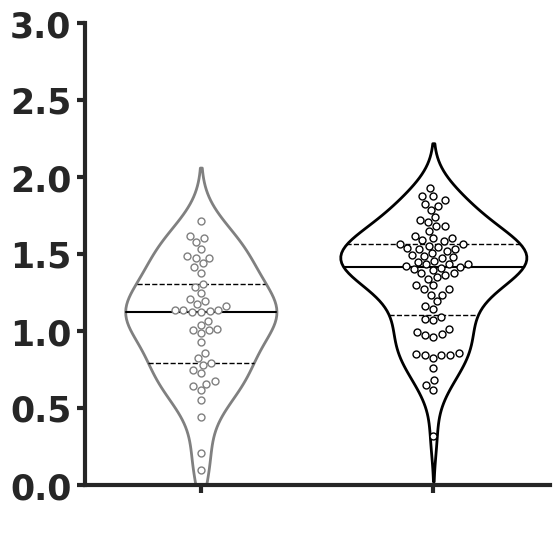

In [27]:
# FD of Necrotic Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'ncr_net_meanfd',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'ncr_net_meanfd',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])
# x1 = "MGMT_promoter_status"
# y1 = "ncr_net_meanfd"
# order = ["Unmethylated","Methylated"]
# add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results - MGMT
methylated_data = MGMT[MGMT['MGMT_promoter_status'] == "Methylated"]['ncr_net_meanfd']
um_data = MGMT[MGMT['MGMT_promoter_status'] == "Unmethylated"]['ncr_net_meanfd']

print('-'*50)
print(methylated_data.median())
print(um_data.median())

median_difference1 = np.median(methylated_data) - np.median(um_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(methylated_data, um_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(methylated_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(um_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(methylated_data, len(methylated_data), replace=True)
    wt_sample = np.random.choice(um_data, len(um_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "MGMT_Status_NCR_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')
palette = ["grey","black"]

<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.3716865955
2.80312049
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0000)
The wt data appears to be not normal (p-value: 0.0000)
--------------------------------------------------
Median Difference:  -1.4314338945 /  Statistic:  838.0 /  p:  5.920964856659712e-06
Confidence Interval for Median Difference: [-1.81310958 -0.93774513]


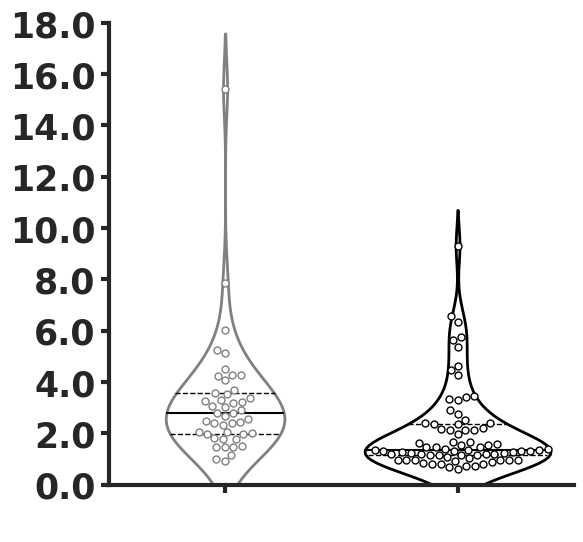

In [28]:
# Lacuranity of Necrotic Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'ncr_net_meanlac',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'ncr_net_meanlac',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,18])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "MGMT_promoter_status"
# y1 = "ncr_net_meanlac"
# order = ["Unmethylated","Methylated"]
# add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results - MGMT
methylated_data = MGMT[MGMT['MGMT_promoter_status'] == "Methylated"]['ncr_net_meanlac']
um_data = MGMT[MGMT['MGMT_promoter_status'] == "Unmethylated"]['ncr_net_meanlac']

print('-'*50)
print(methylated_data.median())
print(um_data.median())

median_difference1 = np.median(methylated_data) - np.median(um_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(methylated_data, um_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(methylated_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(um_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(methylated_data, len(methylated_data), replace=True)
    wt_sample = np.random.choice(um_data, len(um_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")
#plt.savefig(save_path_violin + "MGMT_Status_NCR_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


<Axes.ArtistList of 4 collections>
--------------------------------------------------
0.9289455209999999
1.178193817
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0003)
The wt data appears to be not normal (p-value: 0.0022)
--------------------------------------------------
Median Difference:  -0.24924829599999998 /  Statistic:  1238.0 /  p:  0.019141712387269565
Confidence Interval for Median Difference: [-0.61159563 -0.06739363]


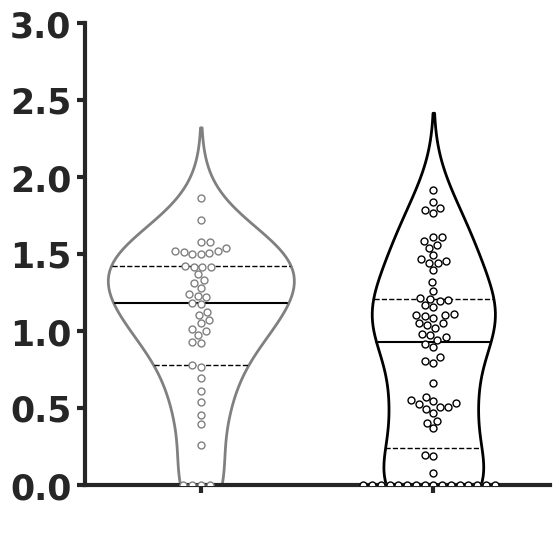

In [29]:
# FD of Enhancing Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'et_meanfd',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'et_meanfd',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])
# x1 = "MGMT_promoter_status"
# y1 = "et_meanfd"
# order = ["Unmethylated","Methylated"]
# add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)



#Statistics for Results - MGMT
methylated_data = MGMT[MGMT['MGMT_promoter_status'] == "Methylated"]['et_meanfd']
um_data = MGMT[MGMT['MGMT_promoter_status'] == "Unmethylated"]['et_meanfd']

print('-'*50)
print(methylated_data.median())
print(um_data.median())

median_difference1 = np.median(methylated_data) - np.median(um_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(methylated_data, um_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(methylated_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(um_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(methylated_data, len(methylated_data), replace=True)
    wt_sample = np.random.choice(um_data, len(um_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "MGMT_Status_ET_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


<Axes.ArtistList of 4 collections>
--------------------------------------------------
3.1786804
2.385556762
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0000)
The wt data appears to be not normal (p-value: 0.0002)
--------------------------------------------------
Median Difference:  0.793123638 /  Statistic:  1485.0 /  p:  0.03580422955696192
Confidence Interval for Median Difference: [-0.17897716  1.65508889]


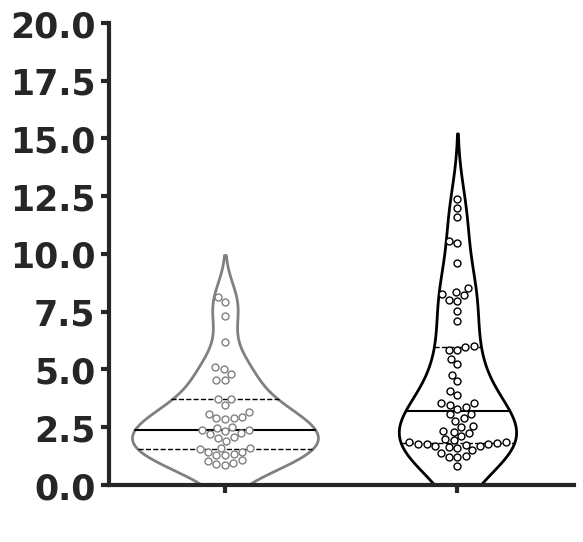

In [30]:
# Lacuranity of Enhancing Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'et_meanlac',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'et_meanlac',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,20])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "MGMT_promoter_status"
# y1 = "et_meanlac"
# order = ["Unmethylated","Methylated"]
# add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results - MGMT
MGMT_mod = MGMT.dropna(subset = 'et_meanlac')
methylated_data = MGMT_mod[MGMT_mod['MGMT_promoter_status'] == "Methylated"]['et_meanlac']
um_data = MGMT_mod[MGMT_mod['MGMT_promoter_status'] == "Unmethylated"]['et_meanlac']

print('-'*50)
print(methylated_data.median())
print(um_data.median())

median_difference1 = np.median(methylated_data) - np.median(um_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(methylated_data, um_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(methylated_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(um_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(methylated_data, len(methylated_data), replace=True)
    wt_sample = np.random.choice(um_data, len(um_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "MGMT_Status_ET_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.9170718994999998
1.937899072
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0000)
The wt data appears to be not normal (p-value: 0.0000)
--------------------------------------------------
Median Difference:  -0.020827172500000213 /  Statistic:  1324.0 /  p:  0.06205136876604466
Confidence Interval for Median Difference: [-0.05192615 -0.00117511]


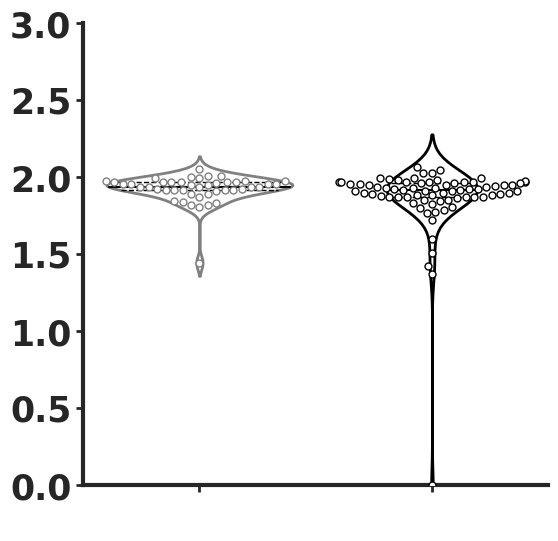

In [31]:
# FD of Edema Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'ed_meanfd',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'ed_meanfd',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "MGMT_promoter_status"
# y1 = "ed_meanfd"
# order = ["Unmethylated","Methylated"]
# add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


#Statistics for Results - MGMT
methylated_data = MGMT[MGMT['MGMT_promoter_status'] == "Methylated"]['ed_meanfd']
um_data = MGMT[MGMT['MGMT_promoter_status'] == "Unmethylated"]['ed_meanfd']

print('-'*50)
print(methylated_data.median())
print(um_data.median())

median_difference1 = np.median(methylated_data) - np.median(um_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(methylated_data, um_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(methylated_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(um_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(methylated_data, len(methylated_data), replace=True)
    wt_sample = np.random.choice(um_data, len(um_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "MGMT_Status_ED_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


<Axes.ArtistList of 4 collections>
--------------------------------------------------
1.223629449
0.955993313
--------------------------------------------------
The mutant data appears to be not normal (p-value: 0.0000)
The wt data appears to be not normal (p-value: 0.0000)
--------------------------------------------------
Median Difference:  0.2676361359999999 /  Statistic:  1998.0 /  p:  0.049197075940419874
Confidence Interval for Median Difference: [0.03576576 0.40982723]


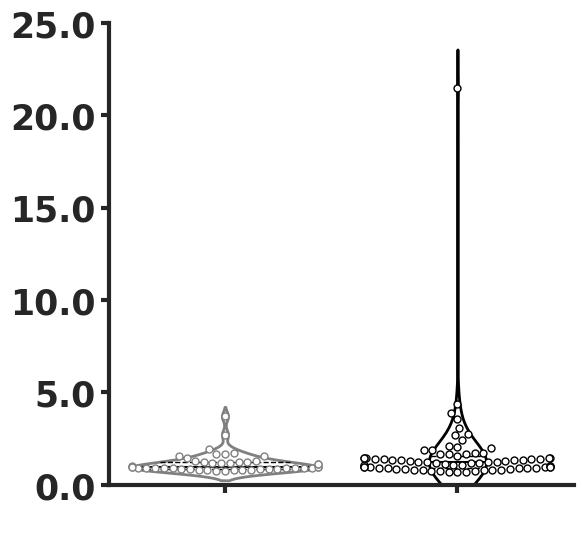

In [32]:
# Lacuranity of Edema Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["grey","black"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'ed_meanlac',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=palette_colors,\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'ed_meanlac',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,25])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

# x1 = "MGMT_promoter_status"
# y1 = "ed_meanlac"
# order = ["Unmethylated","Methylated"]
# add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)





#Statistics for Results - MGMT
MGMT_mod = MGMT.dropna(subset = 'ed_meanlac')
methylated_data = MGMT_mod[MGMT_mod['MGMT_promoter_status'] == "Methylated"]['ed_meanlac']
um_data = MGMT_mod[MGMT_mod['MGMT_promoter_status'] == "Unmethylated"]['ed_meanlac']

print('-'*50)
print(methylated_data.median())
print(um_data.median())

median_difference1 = np.median(methylated_data) - np.median(um_data)   #Median difference
statistic_mann, p_value_mann = stats.mannwhitneyu(methylated_data, um_data, alternative='two-sided')    #mann whitney test


#shapiro's test for normailty
print('-'*50)
statistic, p_value = shapiro(methylated_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")

statistic, p_value = shapiro(um_data)
alpha = 0.05
result = "normal" if p_value > alpha else "not normal"
print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
print('-'*50)


# Confidence Interval Calculation with bootstrapping
num_iterations = 10000
median_differences = []

for _ in range(num_iterations):      #bootstrap loop
    mutant_sample = np.random.choice(methylated_data, len(methylated_data), replace=True)
    wt_sample = np.random.choice(um_data, len(um_data), replace=True)
    median_difference = np.median(mutant_sample) - np.median(wt_sample)
    median_differences.append(median_difference)

confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval

print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
print(f"Confidence Interval for Median Difference: {confidence_interval}")

#plt.savefig(save_path_violin + "MGMT_Status_ED_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


## Violin Plot Statistical Analysis

In [140]:
list = ['ncr_net_meanfd', 'et_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'et_meanlac', 'ed_meanlac', 'wh_tumour_z_meanfd']

#Statistics for Results - MGMT
for i in list:
    print(i)
    MGMT_mod = MGMT.dropna(subset = [i, 'IDH_status'])
    print(len(MGMT_mod))
    methylated_data = MGMT_mod[MGMT_mod['MGMT_promoter_status'] == "Methylated"][i]
    um_data = MGMT_mod[MGMT_mod['MGMT_promoter_status'] == "Unmethylated"][i]
    
    # print('Methylated data Median; ', methylated_data.median())
    # print('Unmethylated data Median; ', um_data.median())
    
    median_difference1 = np.median(methylated_data) - np.median(um_data)   #Median difference
    statistic_mann, p_value_mann = stats.mannwhitneyu(methylated_data, um_data, alternative='two-sided')    #mann whitney test
    
    
    #shapiro's test for normailty
    # print('-'*50)
    # statistic, p_value = shapiro(methylated_data)
    # alpha = 0.05
    # result = "normal" if p_value > alpha else "not normal"
    # print(f"The methylated data appears to be {result} (p-value: {p_value:.4f})")
    
    # statistic, p_value = shapiro(um_data)
    # alpha = 0.05
    # result = "normal" if p_value > alpha else "not normal"
    # print(f"The um data appears to be {result} (p-value: {p_value:.4f})")
    # print('-'*50)
    
    
    print('*Central Statistics*')    
    mad = (methylated_data - np.median(methylated_data)).abs().median()  #Median Absolute Deviation for Median
    print('Methylated Median: ', methylated_data.median(), '\nMedian Absolute Deviation (Methylated): ', mad)

    print('')

    mad2 = (um_data - np.median(um_data)).abs().median()
    print('UM Median: ', um_data.median(), '\nMedian Absolute Deviation (um): ',mad2)
    
    print('-'*50)
    # Confidence Interval Calculation with bootstrapping
    num_iterations = 10000
    median_differences = []
    
    for _ in range(num_iterations):      #bootstrap loop
        mutant_sample = np.random.choice(methylated_data, len(methylated_data), replace=True)
        wt_sample = np.random.choice(um_data, len(um_data), replace=True)
        median_difference = np.median(mutant_sample) - np.median(wt_sample)
        median_differences.append(median_difference)
    
    confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval
    
    print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
    print(f"Confidence Interval for Median Difference: {confidence_interval}")
    print('*'*50)

ncr_net_meanfd
119
*Central Statistics*
Methylated Median:  1.4156925235000002 
Median Absolute Deviation (Methylated):  0.1884981579999998

UM Median:  1.124665361 
Median Absolute Deviation (um):  0.290970183
--------------------------------------------------
Median Difference:  0.29102716250000027 /  Statistic:  2374.0 /  p:  0.00010336416612890333
Confidence Interval for Median Difference: [0.21934763 0.4281305 ]
**************************************************
et_meanfd
119
*Central Statistics*
Methylated Median:  0.9289455209999999 
Median Absolute Deviation (Methylated):  0.4893862615

UM Median:  1.178193817 
Median Absolute Deviation (um):  0.31910358000000016
--------------------------------------------------
Median Difference:  -0.24924829599999998 /  Statistic:  1238.0 /  p:  0.019141712387269565
Confidence Interval for Median Difference: [-0.61560651 -0.06103508]
**************************************************
ed_meanfd
119
*Central Statistics*
Methylated Median:  1.9

In [141]:
#Statistics for Results
for i in list:
    print(i)
    IDH_mod = IDH.dropna(subset=i)
    print(len(IDH_mod))
    mutant_data = IDH_mod[IDH_mod['IDH_status'] == "Mutant"][i]
    wt_data = IDH_mod[IDH_mod['IDH_status'] == "WT"][i]
    
    print('-'*50)
    # print('WTmedian: ',wt_data.median())
    # print('Mutant Median: ',mutant_data.median())    
    
    
    median_difference1 = np.median(mutant_data) - np.median(wt_data)   #Median difference
    statistic_mann, p_value_mann = stats.mannwhitneyu(mutant_data, wt_data, alternative='two-sided')    #mann whitney test
        
    #shapiro's test for normailty
    # print('Shapiro\'s test for normality')
    # statistic, p_value = shapiro(mutant_data)
    # alpha = 0.05
    # result = "normal" if p_value > alpha else "not normal"
    # print(f"The mutant data appears to be {result} (p-value: {p_value:.4f})")
    
    # statistic, p_value = shapiro(wt_data)
    # alpha = 0.05
    # result = "normal" if p_value > alpha else "not normal"
    # print(f"The wt data appears to be {result} (p-value: {p_value:.4f})")
    
    # print('-'*50)
    
    print('*Central Statistics*')    
    mad = (mutant_data - np.median(mutant_data)).abs().median()  #Median Absolute Deviation for Median
    print('Mutant Median: ', mutant_data.median(), '\nMedian Absolute Deviation (Mutant): ', mad)

    print('')

    mad2 = (wt_data - np.median(wt_data)).abs().median()
    print('WT Median: ', wt_data.median(), '\nMedian Absolute Deviation (WT): ',mad2)

    
    print('-'*50)   
    # Confidence Interval Calculation with bootstrapping
    num_iterations = 10000
    median_differences = []
    
    for _ in range(num_iterations):      #bootstrap loop
        mutant_sample = np.random.choice(mutant_data, len(mutant_data), replace=True)
        wt_sample = np.random.choice(wt_data, len(wt_data), replace=True)
        median_difference = np.median(mutant_sample) - np.median(wt_sample)
        median_differences.append(median_difference)
    
    confidence_interval = np.percentile(median_differences, [5, 95])  #95% confidence interval
    
    print('Median Difference: ', median_difference1, '/ ', 'Statistic: ', statistic_mann, '/ ', 'p: ', p_value_mann)
    print(f"Confidence Interval for Median Difference: {confidence_interval}")
    print('*'*50)

ncr_net_meanfd
142
--------------------------------------------------
*Central Statistics*
Mutant Median:  1.480884053 
Median Absolute Deviation (Mutant):  0.18515908999999997

WT Median:  1.128704535 
Median Absolute Deviation (WT):  0.273139594
--------------------------------------------------
Median Difference:  0.352179518 /  Statistic:  3673.0 /  p:  8.306963645987483e-08
Confidence Interval for Median Difference: [0.27240146 0.464562  ]
**************************************************
et_meanfd
142
--------------------------------------------------
*Central Statistics*
Mutant Median:  0.525136217 
Median Absolute Deviation (Mutant):  0.525136217

WT Median:  1.278996284 
Median Absolute Deviation (WT):  0.23224045599999998
--------------------------------------------------
Median Difference:  -0.753860067 /  Statistic:  834.5 /  p:  6.509576328211875e-11
Confidence Interval for Median Difference: [-0.92175854 -0.6133629 ]
**************************************************
ed_

## IDH + MGMT analysis

In [186]:
combi_save_path = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/Final_Violin_plots/Combination_violin Plots/'
len(glioma)

IDH = glioma.dropna(subset = 'IDH_status')
len(IDH)

MGMT = IDH.dropna(subset = 'MGMT_promoter_status')
len(MGMT)

119

In [187]:
IDH_MGMT = glioma.dropna(subset = ["IDH_status","MGMT_promoter_status"])
new_df = IDH_MGMT.copy()
new_df["Combined_status"] = IDH_MGMT["IDH_status"] + IDH_MGMT["MGMT_promoter_status"]

In [188]:
list = ['ncr_net_meanfd', 'et_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'et_meanlac', 'ed_meanlac']

In [189]:
len(new_df)

119

In [190]:
MGMT = glioma.dropna(subset = "MGMT_promoter_status")
len(MGMT)
MGMT_m = MGMT[MGMT['MGMT_promoter_status'] == 'Methylated']
MGMT_m['IDH_status'].value_counts()

IDH_status
Mutant    49
WT        25
Name: count, dtype: int64

<Axes.ArtistList of 8 collections>


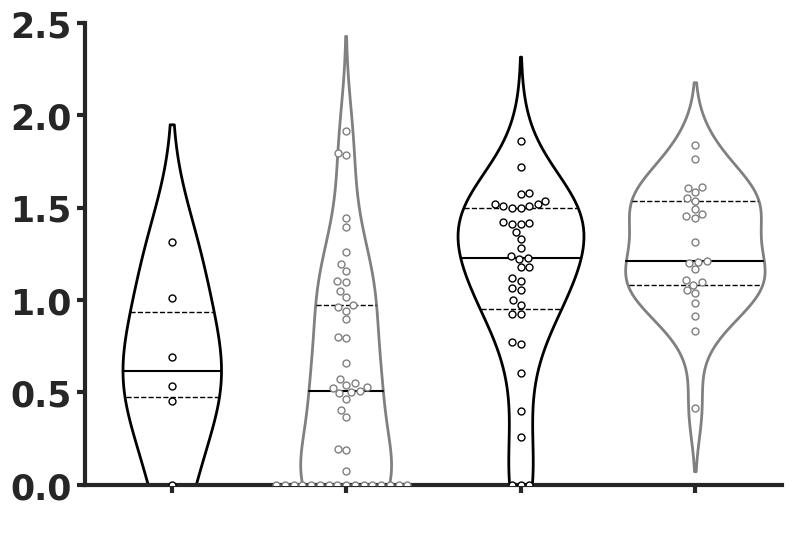

Number of subjects:  119
Global P value 1.361096364138938e-07

P-Values (Uncorrected):
       1      2      3      4
1  1.000  0.811  0.046  0.013
2  0.811  1.000  0.000  0.000
3  0.046  0.000  1.000  0.313
4  0.013  0.000  0.313  1.000

P-Values (Corrected):
       1      2      3      4
1  1.000  1.000  0.277  0.076
2  1.000  1.000  0.000  0.000
3  0.277  0.000  1.000  1.000
4  0.076  0.000  1.000  1.000


In [191]:
# FD Enhancing
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)

palette_colors2 = {"MutantUnmethylated": "white", "MutantMethylated": "white", "WTUnmethylated": "white", "WTMethylated":'white'}
palette = ['grey', 'black']
# palette = ["white","white"]
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.violinplot(x = "Combined_status" , y = "et_meanfd",
                  data = new_df,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"],
                  linewidth=2, scale ='area', dodge = True , showmeans=False, palette=palette_colors2,
                  meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},
                  inner= "quartile")

sns.swarmplot(x = "Combined_status" , y = "et_meanfd",data = new_df,
              order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"], linewidth=1, alpha=1,
              size=5, dodge = True,color = "white", edgecolor='black')

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "," ", " "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,2.5])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    
  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[1])
plt.setp(ax.collections[1], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[0])
plt.setp(ax.collections[4], edgecolor=palette[1])
plt.setp(ax.collections[5], edgecolor=palette[0])
plt.setp(ax.collections[6], edgecolor=palette[1])
plt.setp(ax.collections[7], edgecolor=palette[0])
plt.show()

#Statistics for multiple group comparisions - Kruskal Wallis followed by Dunn's test
print('Number of subjects: ', len(new_df))
array1 = new_df[new_df['Combined_status'] == 'MutantUnmethylated']['et_meanfd'].to_numpy()
array2 = new_df[new_df['Combined_status'] == 'MutantMethylated']['et_meanfd'].to_numpy()
array3 = new_df[new_df['Combined_status'] == 'WTUnmethylated']['et_meanfd'].to_numpy()
array4 = new_df[new_df['Combined_status'] == 'WTMethylated']['et_meanfd'].to_numpy()

statistic, pvalue = kruskal(array1, array2, array3, array4)
print('Global P value',pvalue)

# Perform Dunn's test for pairwise comparisons
result = sp.posthoc_dunn([array1, array2, array3, array4])
print('\nP-Values (Uncorrected):')
print(result.applymap(lambda x: f"{x:.3f}"))

result_corrected = sp.posthoc_dunn([array1, array2, array3, array4], p_adjust='bonferroni')
print('\nP-Values (Corrected):')
print(result_corrected.applymap(lambda x: f"{x:.3f}"))

ax.figure.savefig(combi_save_path + "IDH_MGMT_FD_ET.tiff", dpi = 300, bbox_inches = 'tight')

<Axes.ArtistList of 8 collections>


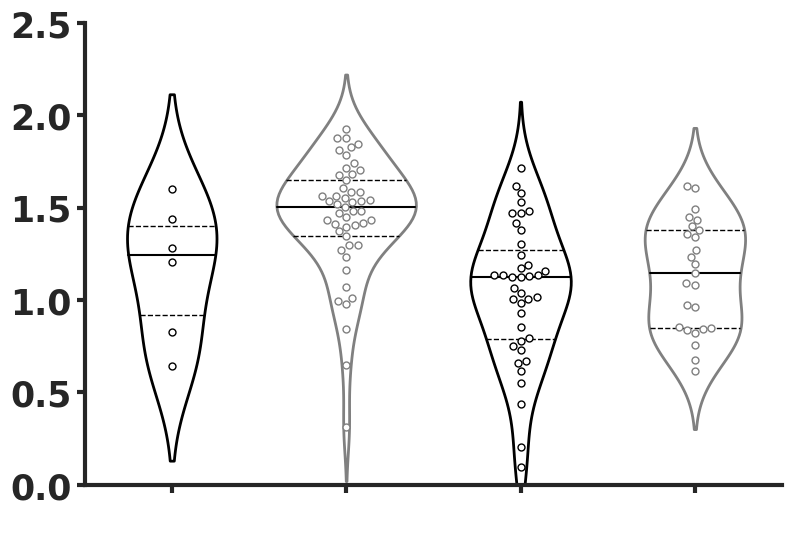

Number of subjects:  119
Global P value 1.2147389671510486e-06

P-Values (Uncorrected):
       1      2      3      4
1  1.000  0.065  0.504  0.752
2  0.065  1.000  0.000  0.000
3  0.504  0.000  1.000  0.561
4  0.752  0.000  0.561  1.000

P-Values (Corrected):
       1      2      3      4
1  1.000  0.388  1.000  1.000
2  0.388  1.000  0.000  0.001
3  1.000  0.000  1.000  1.000
4  1.000  0.001  1.000  1.000


In [192]:
# FD Nonenhancing
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)

palette_colors2 = {"MutantUnmethylated": "white", "MutantMethylated": "white", "WTUnmethylated": "white", "WTMethylated":'white'}
palette = ['grey', 'black']
# palette = ["white","white"]
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.violinplot(x = "Combined_status" , y = "ncr_net_meanfd",
                  data = new_df,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"],
                  linewidth=2, scale ='area', dodge = True , showmeans=False, palette=palette_colors2,
                  meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},
                  inner= "quartile")

sns.swarmplot(x = "Combined_status" , y = "ncr_net_meanfd",data = new_df,
              order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"], linewidth=1, alpha=1,
              size=5, dodge = True,color = "white", edgecolor='black')

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "," ", " "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,2.5])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    
  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[1])
plt.setp(ax.collections[1], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[0])
plt.setp(ax.collections[4], edgecolor=palette[1])
plt.setp(ax.collections[5], edgecolor=palette[0])
plt.setp(ax.collections[6], edgecolor=palette[1])
plt.setp(ax.collections[7], edgecolor=palette[0])
plt.show()

#Statistics for multiple group comparisions - Kruskal Wallis followed by Dunn's test
print('Number of subjects: ', len(new_df))
array1 = new_df[new_df['Combined_status'] == 'MutantUnmethylated']['ncr_net_meanfd'].to_numpy()
array2 = new_df[new_df['Combined_status'] == 'MutantMethylated']['ncr_net_meanfd'].to_numpy()
array3 = new_df[new_df['Combined_status'] == 'WTUnmethylated']['ncr_net_meanfd'].to_numpy()
array4 = new_df[new_df['Combined_status'] == 'WTMethylated']['ncr_net_meanfd'].to_numpy()

statistic, pvalue = kruskal(array1, array2, array3, array4)
print('Global P value',pvalue)

# Perform Dunn's test for pairwise comparisons
result = sp.posthoc_dunn([array1, array2, array3, array4])
print('\nP-Values (Uncorrected):')
print(result.applymap(lambda x: f"{x:.3f}"))

result_corrected = sp.posthoc_dunn([array1, array2, array3, array4], p_adjust='bonferroni')
print('\nP-Values (Corrected):')
print(result_corrected.applymap(lambda x: f"{x:.3f}"))

ax.figure.savefig(combi_save_path + "IDH_MGMT_FD_NET.tiff", dpi = 300, bbox_inches = 'tight')

<Axes.ArtistList of 8 collections>


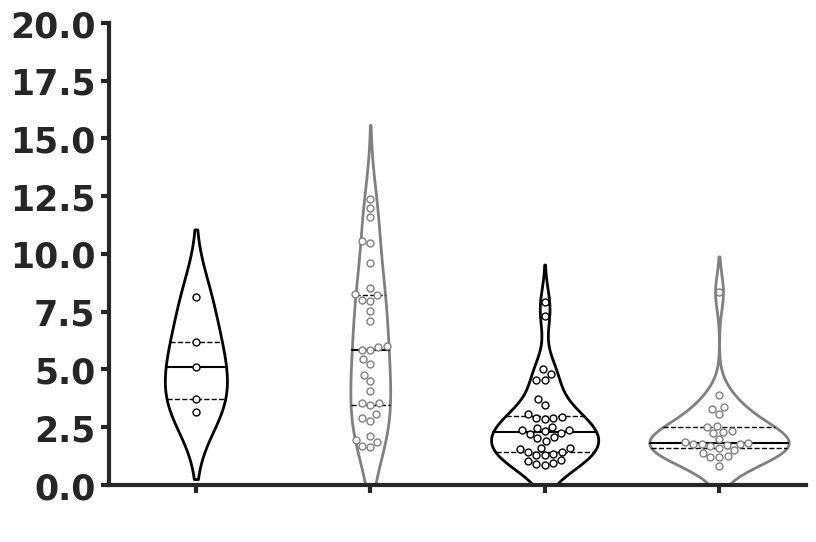

Number of subjects:  99
Global P value 7.279995061619619e-08

P-Values (Uncorrected):
       1      2      3      4
1  1.000  0.868  0.010  0.004
2  0.868  1.000  0.000  0.000
3  0.010  0.000  1.000  0.501
4  0.004  0.000  0.501  1.000

P-Values (Corrected):
       1      2      3      4
1  1.000  1.000  0.060  0.025
2  1.000  1.000  0.000  0.000
3  0.060  0.000  1.000  1.000
4  0.025  0.000  1.000  1.000


In [193]:
# Lac Enhancing
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)

palette_colors2 = {"MutantUnmethylated": "white", "MutantMethylated": "white", "WTUnmethylated": "white", "WTMethylated":'white'}
palette = ['grey', 'black']
# palette = ["white","white"]
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.violinplot(x = "Combined_status" , y = "et_meanlac",
                  data = new_df,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"],
                  linewidth=2, scale ='area', dodge = True , showmeans=False, palette=palette_colors2,
                  meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},
                  inner= "quartile")

sns.swarmplot(x = "Combined_status" , y = "et_meanlac",data = new_df,
              order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"], linewidth=1, alpha=1,
              size=5, dodge = True,color = "white", edgecolor='black')

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "," ", " "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,20])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    
  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[1])
plt.setp(ax.collections[1], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[0])
plt.setp(ax.collections[4], edgecolor=palette[1])
plt.setp(ax.collections[5], edgecolor=palette[0])
plt.setp(ax.collections[6], edgecolor=palette[1])
plt.setp(ax.collections[7], edgecolor=palette[0])
plt.show()

#Statistics for multiple group comparisions - Kruskal Wallis followed by Dunn's test
new_df2 = new_df.dropna(subset='et_meanlac')
print('Number of subjects: ', len(new_df2))

array1 = new_df2[new_df2['Combined_status'] == 'MutantUnmethylated']['et_meanlac'].to_numpy()
array2 = new_df2[new_df2['Combined_status'] == 'MutantMethylated']['et_meanlac'].to_numpy()
array3 = new_df2[new_df2['Combined_status'] == 'WTUnmethylated']['et_meanlac'].to_numpy()
array4 = new_df2[new_df2['Combined_status'] == 'WTMethylated']['et_meanlac'].to_numpy()

statistic, pvalue = kruskal(array1, array2, array3, array4)
print('Global P value',pvalue)

# Perform Dunn's test for pairwise comparisons
result = sp.posthoc_dunn([array1, array2, array3, array4])
print('\nP-Values (Uncorrected):')
print(result.applymap(lambda x: f"{x:.3f}"))

result_corrected = sp.posthoc_dunn([array1, array2, array3, array4], p_adjust='bonferroni')
print('\nP-Values (Corrected):')
print(result_corrected.applymap(lambda x: f"{x:.3f}"))

ax.figure.savefig(combi_save_path + "IDH_MGMT_LAC_ET.tiff", dpi = 300, bbox_inches = 'tight')

<Axes.ArtistList of 8 collections>


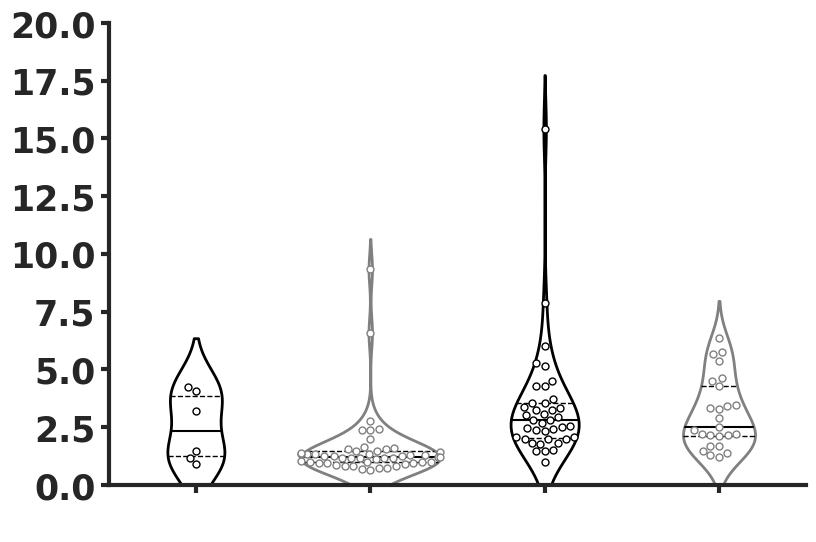

Number of subjects:  119
Global P-value 4.961217807519431e-11

P-Values (Uncorrected):
       1      2      3      4
1  1.000  0.051  0.226  0.292
2  0.051  1.000  0.000  0.000
3  0.226  0.000  1.000  0.840
4  0.292  0.000  0.840  1.000

P-Values (Corrected):
       1      2      3      4
1  1.000  0.307  1.000  1.000
2  0.307  1.000  0.000  0.000
3  1.000  0.000  1.000  1.000
4  1.000  0.000  1.000  1.000


In [194]:
# Lac Nonenhancing
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)

palette_colors2 = {"MutantUnmethylated": "white", "MutantMethylated": "white", "WTUnmethylated": "white", "WTMethylated":'white'}
palette = ['grey', 'black']
# palette = ["white","white"]
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.violinplot(x = "Combined_status" , y = "ncr_net_meanlac",
                  data = new_df,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"],
                  linewidth=2, scale ='area', dodge = True , showmeans=False, palette=palette_colors2,
                  meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},
                  inner= "quartile")

sns.swarmplot(x = "Combined_status" , y = "ncr_net_meanlac",data = new_df,
              order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"], linewidth=1, alpha=1,
              size=5, dodge = True,color = "white", edgecolor='black')

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "," ", " "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,20])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    
  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[1])
plt.setp(ax.collections[1], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[0])
plt.setp(ax.collections[4], edgecolor=palette[1])
plt.setp(ax.collections[5], edgecolor=palette[0])
plt.setp(ax.collections[6], edgecolor=palette[1])
plt.setp(ax.collections[7], edgecolor=palette[0])
plt.show()

#Statistics for multiple group comparisions - Kruskal Wallis followed by Dunn's test
print('Number of subjects: ', len(new_df))

array1 = new_df[new_df['Combined_status'] == 'MutantUnmethylated']['ncr_net_meanlac'].to_numpy()
array2 = new_df[new_df['Combined_status'] == 'MutantMethylated']['ncr_net_meanlac'].to_numpy()
array3 = new_df[new_df['Combined_status'] == 'WTUnmethylated']['ncr_net_meanlac'].to_numpy()
array4 = new_df[new_df['Combined_status'] == 'WTMethylated']['ncr_net_meanlac'].to_numpy()

statistic, pvalue = kruskal(array1, array2, array3, array4)
print('Global P-value', pvalue)

# Perform Dunn's test for pairwise comparisons
result = sp.posthoc_dunn([array1, array2, array3, array4])
print('\nP-Values (Uncorrected):')
print(result.applymap(lambda x: f"{x:.3f}"))

result_corrected = sp.posthoc_dunn([array1, array2, array3, array4], p_adjust='bonferroni')
print('\nP-Values (Corrected):')
print(result_corrected.applymap(lambda x: f"{x:.3f}"))

ax.figure.savefig(combi_save_path + "IDH_MGMT_LAC_NET.tiff", dpi = 300, bbox_inches = 'tight')

<Axes.ArtistList of 8 collections>


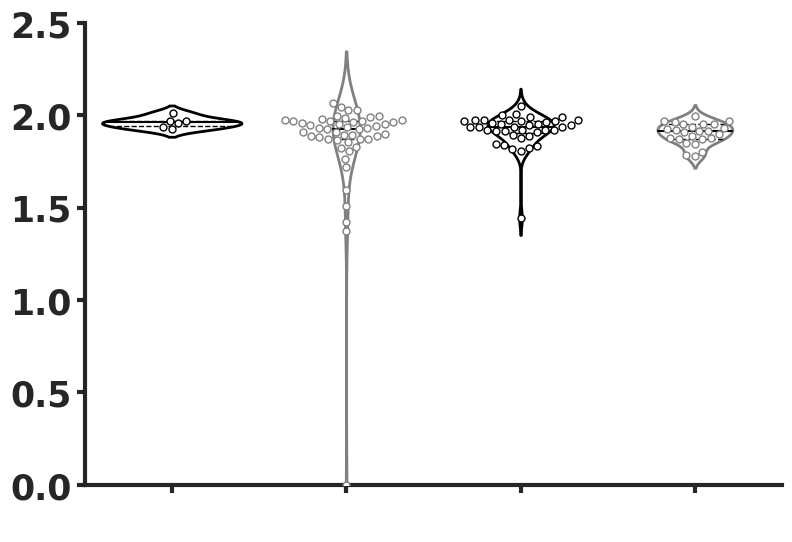

Number of subjects:  119
Global P value 0.1025477711499463

P-Values (Uncorrected):
       1      2      3      4
1  1.000  0.072  0.184  0.025
2  0.072  1.000  0.363  0.333
3  0.184  0.363  1.000  0.091
4  0.025  0.333  0.091  1.000

P-Values (Corrected):
       1      2      3      4
1  1.000  0.432  1.000  0.153
2  0.432  1.000  1.000  1.000
3  1.000  1.000  1.000  0.546
4  0.153  1.000  0.546  1.000


In [195]:
# FD Edema
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)

palette_colors2 = {"MutantUnmethylated": "white", "MutantMethylated": "white", "WTUnmethylated": "white", "WTMethylated":'white'}
palette = ['grey', 'black']
# palette = ["white","white"]
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.violinplot(x = "Combined_status" , y = "ed_meanfd",
                  data = new_df,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"],
                  linewidth=2, scale ='area', dodge = True , showmeans=False, palette=palette_colors2,
                  meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},
                  inner= "quartile")

sns.swarmplot(x = "Combined_status" , y = "ed_meanfd",data = new_df,
              order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"], linewidth=1, alpha=1,
              size=5, dodge = True,color = "white", edgecolor='black')

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "," ", " "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,2.5])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    
  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[1])
plt.setp(ax.collections[1], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[0])
plt.setp(ax.collections[4], edgecolor=palette[1])
plt.setp(ax.collections[5], edgecolor=palette[0])
plt.setp(ax.collections[6], edgecolor=palette[1])
plt.setp(ax.collections[7], edgecolor=palette[0])
plt.show()

#Statistics for multiple group comparisions - Kruskal Wallis followed by Dunn's test
print('Number of subjects: ', len(new_df))
array1 = new_df[new_df['Combined_status'] == 'MutantUnmethylated']['ed_meanfd'].to_numpy()
array2 = new_df[new_df['Combined_status'] == 'MutantMethylated']['ed_meanfd'].to_numpy()
array3 = new_df[new_df['Combined_status'] == 'WTUnmethylated']['ed_meanfd'].to_numpy()
array4 = new_df[new_df['Combined_status'] == 'WTMethylated']['ed_meanfd'].to_numpy()

statistic, pvalue = kruskal(array1, array2, array3, array4)
print('Global P value',pvalue)

# Perform Dunn's test for pairwise comparisons
result = sp.posthoc_dunn([array1, array2, array3, array4])
print('\nP-Values (Uncorrected):')
print(result.applymap(lambda x: f"{x:.3f}"))

result_corrected = sp.posthoc_dunn([array1, array2, array3, array4], p_adjust='bonferroni')
print('\nP-Values (Corrected):')
print(result_corrected.applymap(lambda x: f"{x:.3f}"))

ax.figure.savefig(combi_save_path + "IDH_MGMT_FD_ED.tiff", dpi = 300, bbox_inches = 'tight')

<Axes.ArtistList of 8 collections>


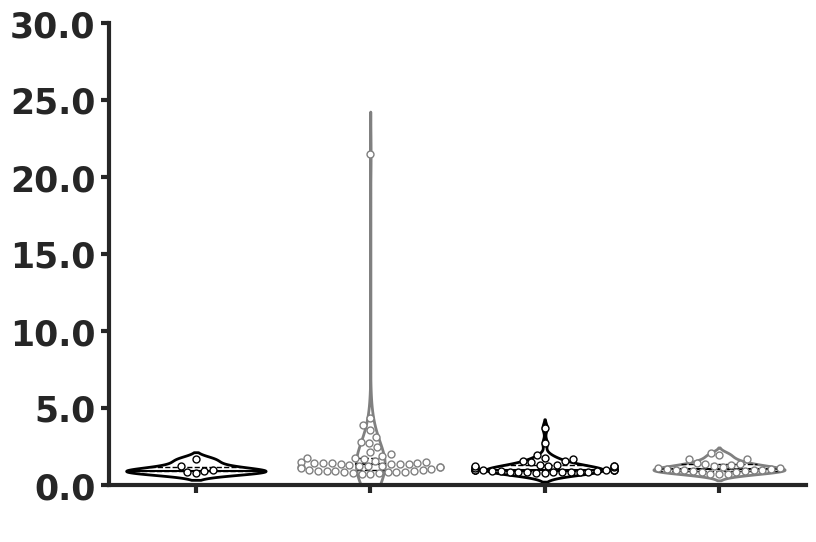

Number of subjects:  119
Global P value nan

P-Values (Uncorrected):
       1      2      3      4
1  1.000  0.104  0.633  0.570
2  0.104  1.000  0.022  0.070
3  0.633  0.022  1.000  0.850
4  0.570  0.070  0.850  1.000

P-Values (Corrected):
       1      2      3      4
1  1.000  0.622  1.000  1.000
2  0.622  1.000  0.130  0.421
3  1.000  0.130  1.000  1.000
4  1.000  0.421  1.000  1.000


In [196]:
# Lac Edema
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)

palette_colors2 = {"MutantUnmethylated": "white", "MutantMethylated": "white", "WTUnmethylated": "white", "WTMethylated":'white'}
palette = ['grey', 'black']
# palette = ["white","white"]
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.violinplot(x = "Combined_status" , y = "ed_meanlac",
                  data = new_df,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"],
                  linewidth=2, scale ='area', dodge = True , showmeans=False, palette=palette_colors2,
                  meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},
                  inner= "quartile")

sns.swarmplot(x = "Combined_status" , y = "ed_meanlac",data = new_df,
              order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"], linewidth=1, alpha=1,
              size=5, dodge = True,color = "white", edgecolor='black')

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "," ", " "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,30])
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    
  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[1])
plt.setp(ax.collections[1], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[0])
plt.setp(ax.collections[4], edgecolor=palette[1])
plt.setp(ax.collections[5], edgecolor=palette[0])
plt.setp(ax.collections[6], edgecolor=palette[1])
plt.setp(ax.collections[7], edgecolor=palette[0])
plt.show()

#Statistics for multiple group comparisions - Kruskal Wallis followed by Dunn's test
print('Number of subjects: ', len(new_df))
array1 = new_df[new_df['Combined_status'] == 'MutantUnmethylated']['ed_meanlac'].to_numpy()
array2 = new_df[new_df['Combined_status'] == 'MutantMethylated']['ed_meanlac'].to_numpy()
array3 = new_df[new_df['Combined_status'] == 'WTUnmethylated']['ed_meanlac'].to_numpy()
array4 = new_df[new_df['Combined_status'] == 'WTMethylated']['ed_meanlac'].to_numpy()

statistic, pvalue = kruskal(array1, array2, array3, array4)
print('Global P value',pvalue)

# Perform Dunn's test for pairwise comparisons
result = sp.posthoc_dunn([array1, array2, array3, array4])
print('\nP-Values (Uncorrected):')
print(result.applymap(lambda x: f"{x:.3f}"))

result_corrected = sp.posthoc_dunn([array1, array2, array3, array4], p_adjust='bonferroni')
print('\nP-Values (Corrected):')
print(result_corrected.applymap(lambda x: f"{x:.3f}"))

ax.figure.savefig(combi_save_path + "IDH_MGMT_LAC_ED.tiff", dpi = 300, bbox_inches = 'tight')

In [209]:
#Combined Statistical Analysis
list = ['ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac']

#Statistics for Results - MGMT
for i in list:
    print(i)
    new_df_mod = new_df.dropna(subset = [i, 'IDH_status'])
    print(len(new_df_mod))

    mt_unmeth = new_df_mod[new_df_mod['Combined_status'] == "MutantUnmethylated"][i]
    mt_meth = new_df_mod[new_df_mod['Combined_status'] == "MutantMethylated"][i]    
    wt_unmeth = new_df_mod[new_df_mod['Combined_status'] == "WTUnmethylated"][i] 
    wt_meth = new_df_mod[new_df_mod['Combined_status'] == "WTMethylated"][i]  
     
    
    print(len(mt_unmeth), len(mt_meth), len(wt_unmeth), len(wt_meth))
    
    # methylated_data = MGMT_mod[MGMT_mod['MGMT_promoter_status'] == "Methylated"][i]
    # um_data = MGMT_mod[MGMT_mod['MGMT_promoter_status'] == "Unmethylated"][i]
    
    # print('Methylated data Median; ', methylated_data.median())
    # print('Unmethylated data Median; ', um_data.median())
    
    median_difference1 = np.median(mt_unmeth) - np.median(mt_meth)
    median_difference2 = np.median(mt_unmeth) - np.median(wt_unmeth)
    median_difference3 = np.median(mt_unmeth) - np.median(wt_meth)
    median_difference4 = np.median(mt_meth) - np.median(wt_unmeth)
    median_difference5 = np.median(mt_meth) - np.median(wt_meth)
    median_difference6 = np.median(wt_unmeth) - np.median(wt_meth)
    
    #Median difference
    # statistic_mann, p_value_mann = stats.mannwhitneyu(methylated_data, um_data, alternative='two-sided') #mann whitney test

    
    
    print('*Central Statistics*')    
    mad = (mt_unmeth - np.median(mt_unmeth)).abs().median()  #Median Absolute Deviation for Median
    print('MutantUnmethylated Median: ', mt_unmeth.median(), '\nMedian Absolute Deviation (MutantUnmethylated): ', mad)
    print('')

    mad2 = (mt_meth - np.median(mt_meth)).abs().median()
    print('MutantMethylated Median: ', mt_meth.median(), '\nMedian Absolute Deviation (MutantMethylated): ', mad2)
    print('')
    
    mad3 = (wt_unmeth - np.median(wt_unmeth)).abs().median()  
    print('WTUnmethylated Median: ', wt_unmeth.median(), '\nMedian Absolute Deviation (WTUnmethylated): ', mad3)
    print('')

    mad4 = (wt_meth - np.median(wt_meth)).abs().median()  
    print('WTMethylated Median: ', wt_meth.median(), '\nMedian Absolute Deviation (WTMethylated): ', mad4)
    print('')
    
    print('-'*50)
    
    # Confidence Interval Calculation with bootstrapping
    num_iterations = 1000
    median_differences1 = []
    median_differences2 = []
    median_differences3 = []
    median_differences4 = []
    
    for _ in range(num_iterations):      #bootstrap loop
        mt_unmeth_sample = np.random.choice(mt_unmeth, len(mt_unmeth), replace=True)
        mt_meth_sample = np.random.choice(mt_meth, len(mt_meth), replace=True)
        wt_unmeth_sample = np.random.choice(wt_unmeth, len(wt_unmeth), replace=True)
        wt_meth_sample = np.random.choice(wt_meth, len(wt_meth), replace=True)
        
        difference1 = np.median(mt_unmeth_sample) - np.median(mt_meth_sample)
        difference2 = np.median(mt_unmeth_sample) - np.median(wt_unmeth_sample)
        difference3 = np.median(mt_meth_sample) - np.median(wt_meth_sample)
        difference4 = np.median(wt_unmeth_sample) - np.median(wt_meth_sample)
        
        median_differences1.append(difference1)
        median_differences2.append(difference2)
        median_differences3.append(difference3)
        median_differences4.append(difference4)
    
    confidence_interval1 = np.percentile(median_differences1, [5, 95])  #95% confidence interval
    confidence_interval2 = np.percentile(median_differences2, [5, 95])  #95% confidence interval
    confidence_interval3 = np.percentile(median_differences3, [5, 95])  #95% confidence interval
    confidence_interval4 = np.percentile(median_differences4, [5, 95])  #95% confidence interval
    
    # print('Median Difference (mt_unmeth vs mt_meth): ', difference1)
    # print('Median Difference (mt_unmeth vs wt_unmeth): ', difference2)
    # print('Median Difference (mt_meth vs wt_meth): ', difference3)
    # print('Median Difference (wt_unmeth vs wt_meth): ', difference4)
        
    # print(f"Confidence Interval for Median Difference (mt_unmeth vs mt_meth): {confidence_interval1}")
    # print(f"Confidence Interval for Median Difference (mt_unmeth vs wt_unmeth): {confidence_interval2}")
    # print(f"Confidence Interval for Median Difference (mt_meth vs wt_meth): {confidence_interval3}")
    # print(f"Confidence Interval for Median Difference (wt_unmeth vs wt_meth): {confidence_interval4}")

    data = {'Combination': ['MutUnM/MutM', 'MutUnM/WTUnM', 'MutM/WTM', 'WTUnM/WTM'],
            'Median Difference': [round(difference1, 3), round(difference2, 3), round(difference3, 3), round(difference4, 3)],
            'CI': [tuple(map(lambda x: round(x, 3), confidence_interval1)),
                   tuple(map(lambda x: round(x, 3), confidence_interval2)),
                   tuple(map(lambda x: round(x, 3), confidence_interval3)),
                   tuple(map(lambda x: round(x, 3), confidence_interval4))]
            } 
    
    result = pd.DataFrame(data)
    print(result)
    print('*' * 50)

ncr_net_meanfd
119
6 49 39 25
*Central Statistics*
MutantUnmethylated Median:  1.2438243825000002 
Median Absolute Deviation (MutantUnmethylated):  0.27574596799999984

MutantMethylated Median:  1.503600424 
Median Absolute Deviation (MutantMethylated):  0.15475406599999997

WTUnmethylated Median:  1.122871584 
Median Absolute Deviation (WTUnmethylated):  0.26730664300000007

WTMethylated Median:  1.144051166 
Median Absolute Deviation (WTMethylated):  0.28823083399999994

--------------------------------------------------
    Combination  Median Difference                CI
0   MutUnM/MutM             -0.047  (-0.699, -0.031)
1  MutUnM/WTUnM              0.389   (-0.298, 0.395)
2      MutM/WTM              0.372     (0.164, 0.56)
3     WTUnM/WTM             -0.065   (-0.254, 0.161)
**************************************************
et_meanfd
119
6 49 39 25
*Central Statistics*
MutantUnmethylated Median:  0.614375942 
Median Absolute Deviation (MutantUnmethylated):  0.280578905

Mutant

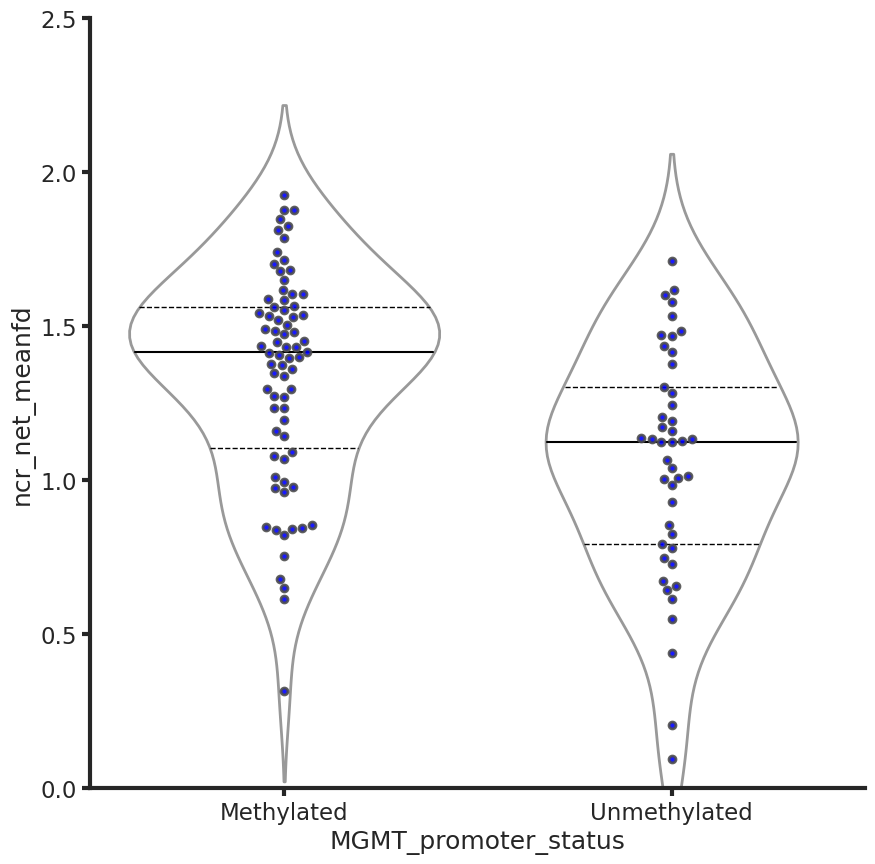

In [208]:
palette = ["white","white","white","white"]
ax = sns.violinplot(x = "MGMT_promoter_status" , y = "ncr_net_meanfd",data = new_df,order = ["Methylated", 'Unmethylated'],
                  linewidth=2, scale ='area', color="black",dodge = True , showmeans=False ,palette=sns.color_palette(palette,4),
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")
sns.swarmplot(x = "MGMT_promoter_status" , y = "ncr_net_meanfd",data = new_df,order = ["Methylated", 'Unmethylated'], linewidth=2, alpha=0.9,\
              size=5, dodge = True,color = "blue")

# ax.set_xticklabels(["mut/unmeth","mut/meth","wt/unmeth","wt/meth"], size = 20, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,2.5])

for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")   

# ax.figure.savefig('combined2.jpg', dpi = 300)

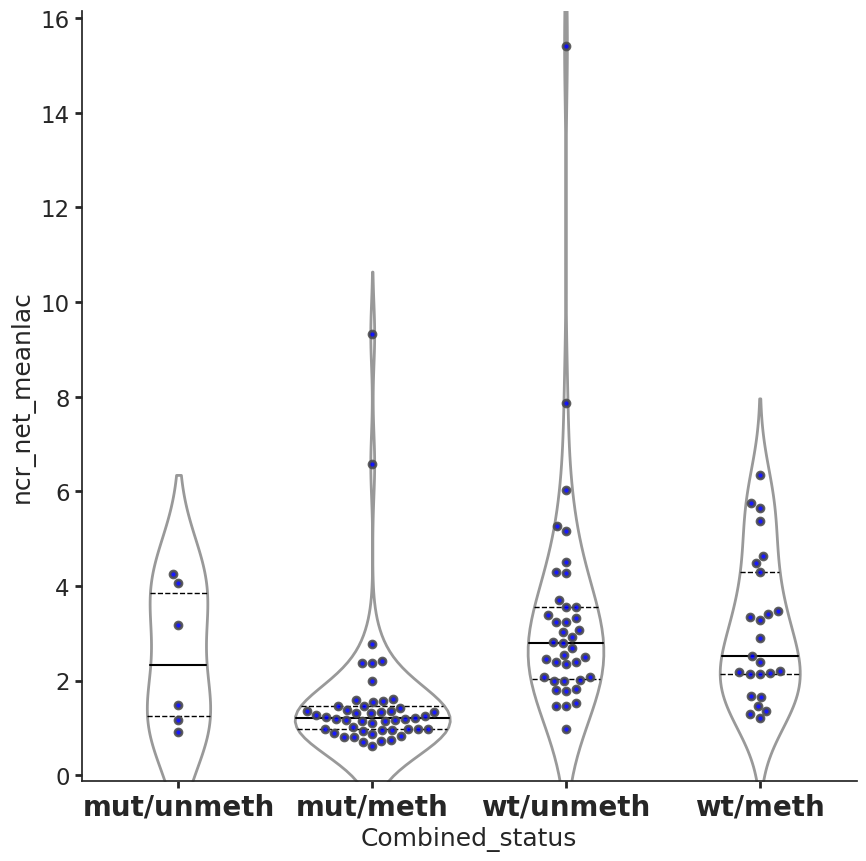

In [163]:
palette = ["white","white","white","white"]
ax = sns.violinplot(x = "Combined_status" , y = "ncr_net_meanlac",data = new_df,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"],
                  linewidth=2, scale ='area', color="black",dodge = True , showmeans=False ,palette=sns.color_palette(palette,4),
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")
sns.swarmplot(x = "Combined_status" , y = "ncr_net_meanlac",data = new_df,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"], linewidth=2, alpha=0.9,\
              size=5, dodge = True,color = "blue")

ax.set_xticklabels(["mut/unmeth","mut/meth","wt/unmeth","wt/meth"], size = 20, fontdict = {"weight" : "bold"})
# ax.set_ylim([0.0,2.5])

for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")   

# ax.figure.savefig('combined.jpg', dpi = 300)

In [136]:
for i in list:
    # df_com = new_df.dropna(subset=[i])
    df_com = new_df.copy()
    com1 = df_com[df_com['Combined_status'] == "MutantUnmethylated"][i]
    com2 = df_com[df_com['Combined_status'] == "MutantMethylated"][i]
    com3 = df_com[df_com['Combined_status'] == "WTUnmethylated"][i]
    com4 = df_com[df_com['Combined_status'] == "WTMethylated"][i]

   
    statistic_1, p_value_1 = stats.mannwhitneyu(com1, com2, alternative='two-sided')
    statistic_2, p_value_2 = stats.mannwhitneyu(com1, com3, alternative='two-sided')
    statistic_3, p_value_3 = stats.mannwhitneyu(com1, com4, alternative='two-sided')
    statistic_4, p_value_4 = stats.mannwhitneyu(com2, com3, alternative='two-sided')
    statistic_5, p_value_5 = stats.mannwhitneyu(com2, com4, alternative='two-sided')
    statistic_6, p_value_6 = stats.mannwhitneyu(com3, com4, alternative='two-sided')

    print(i)

    data = {'Combination': ['MutUnM/MutM', 'MutUnM/WTUnM', 'MutUnM/WTM', 'MutM/WTUnM', 'MutM/WTM', 'WTUnM/WTM' ],
        'P-Values': [p_value_1, p_value_2, p_value_3, p_value_4, p_value_5, p_value_6]}
    
    new = pd.DataFrame(data)
    new['P-Values'] = new['P-Values'].round(2)

    print(new)
    print('*' * 50)

print('*' * 50)
print("MutantUnmethylated: ", len(com1),'\n', "MutantMethylated: ", len(com2), '\n', 
      "WTUnmethylated: ", len(com3),'\n', "WTMethylated: ", len(com4))

ncr_net_meanfd
    Combination  P-Values
0   MutUnM/MutM      0.06
1  MutUnM/WTUnM      0.42
2    MutUnM/WTM      0.86
3    MutM/WTUnM      0.00
4      MutM/WTM      0.00
5     WTUnM/WTM      0.42
**************************************************
et_meanfd
    Combination  P-Values
0   MutUnM/MutM      0.57
1  MutUnM/WTUnM      0.03
2    MutUnM/WTM      0.00
3    MutM/WTUnM      0.00
4      MutM/WTM      0.00
5     WTUnM/WTM      0.32
**************************************************
ed_meanfd
    Combination  P-Values
0   MutUnM/MutM      0.13
1  MutUnM/WTUnM      0.17
2    MutUnM/WTM      0.01
3    MutM/WTUnM      0.41
4      MutM/WTM      0.45
5     WTUnM/WTM      0.07
**************************************************
ncr_net_meanlac
    Combination  P-Values
0   MutUnM/MutM      0.09
1  MutUnM/WTUnM      0.39
2    MutUnM/WTM      0.31
3    MutM/WTUnM      0.00
4      MutM/WTM      0.00
5     WTUnM/WTM      0.88
**************************************************
et_meanlac
    Co

In [157]:
# sns.set(rc={'figure.figsize':(10,10)})
# sns.set(font_scale = 1.5)
# sns.set_style(style='white')
# plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['xtick.major.width'] = 2
# plt.rcParams['xtick.bottom'] = True
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['ytick.major.width'] = 2
# plt.rcParams['ytick.left'] = True

# #palette = ["green","darkred"]
# palette = ["goldenrod","seagreen","coral","darkviolet"]

# s = sns.boxplot(x = "Combined_status", y = "et_meanfd",data = new_df,palette = sns.color_palette(palette,4),\
#                 linewidth = 1,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"], 
#                 width = 0.2, fliersize=0)
# #s.set_xlabel(s.get_xlabel(),weight = "bold")
# s.set_xlabel("IDH/MGMT Combined Status", size = 25, weight = "bold")
# s.set_ylabel("FD of Enhancing Component", size = 25, weight = "bold")
# s.set_xticklabels(["mut/unmeth","mut/meth","wt/unmeth","wt/meth"], size = 20, fontdict = {"weight" : "bold"})
# s.set_ylim([0.0,2.0])
# s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})

# # box_patches = [patch for patch in s.patches if type(patch) == matplotlib.patches.PathPatch]
# # for i,box in enumerate(box_patches):
# #     box.set_edgecolor(palette[i])
# #     # print(i)
# #     box.set_facecolor('white')

# #     # iterate over whiskers and median lines
# #     for j in range(6*i,6*(i+1)):
# #          s.lines[j].set_color(palette[i])




# # x1 = "Combined_status"
# # y1 = "ncr_net_meanfd"
# # order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"]
# # # label_number = [np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "Low"),np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "High")]
# # # label_ = []
# # # for i in range(len(order)):
# # #     label_.append(order[i] + " - " + str(label_number[i]) + " Scans")


# # # custom = [Line2D([], [], marker = "o",color = palette[0], linestyle='None'),
# # #           Line2D([], [], marker = "o", color = palette[1], linestyle='None')]
# # add_stat_annotation(s,data=IDH_MGMT, x=x1, y=y1,order=order, box_pairs = [("MutantUnmethylated","MutantMethylated"),("WTUnmethylated","WTMethylated")],
# #                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
# # plt.legend(custom,label_,loc='upper right')
# # s.set_title("Brain Age Gap between WMH groups in Normal Subjects",y = 1.2,size = 25, fontweight = "bold")

# # plt.savefig(save_path_misc + "MGMT_Status_IDH_MGMT_NCR_FD.tiff", dpi = 300, bbox_inches = 'tight')
# plt.show()

## Extra

0
1
2
3
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MutantUnmethylated v.s. MutantMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.178e-02 U_stat=1.270e+02
WTUnmethylated v.s. WTMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.640e+02


/tmp/ipykernel_161614/1557232619.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


(<Axes: xlabel='IDH/MGMT Combined Status', ylabel='Lacuranity of Necrotic Component'>,
  <statannot.StatResult.StatResult at 0x7feefcb16470>])

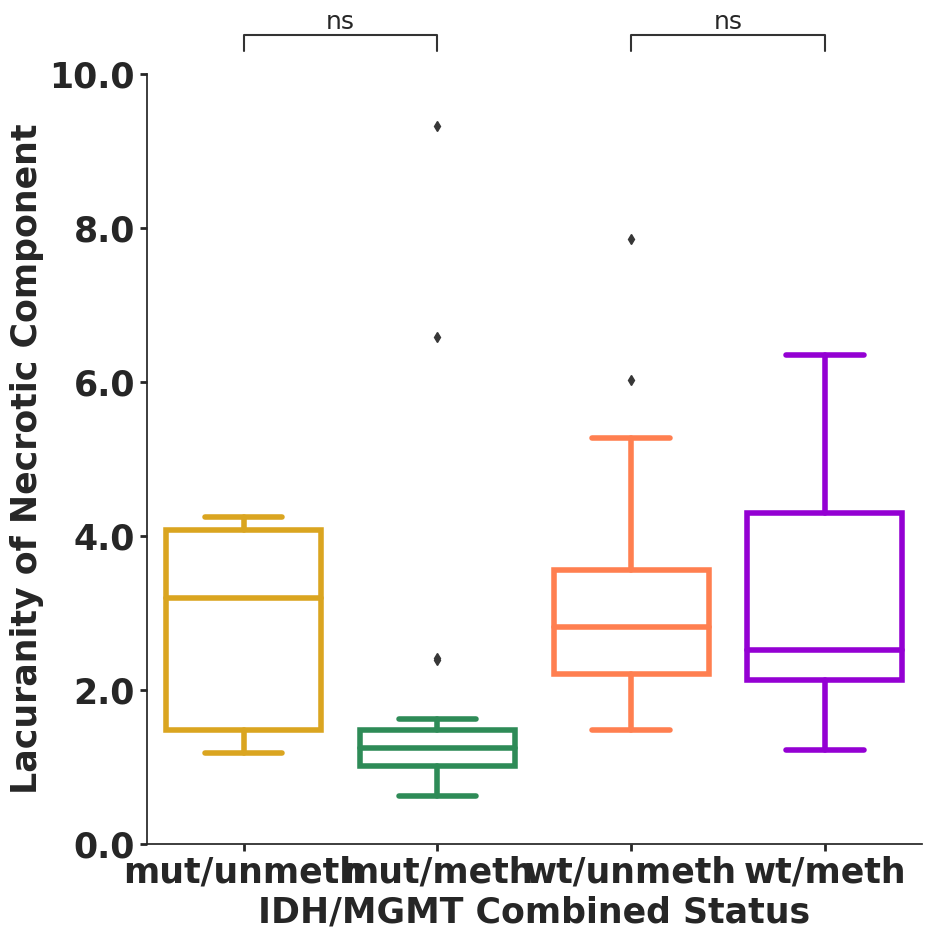

In [149]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.left'] = True

#palette = ["green","darkred"]
palette = ["goldenrod","seagreen","coral","darkviolet"]

s = sns.boxplot(x = "Combined_status", y = "ncr_net_meanlac",data = IDH_MGMT,palette = sns.color_palette(palette,4),\
                  linewidth = 4,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"])
#s.set_xlabel(s.get_xlabel(),weight = "bold")
s.set_xlabel("IDH/MGMT Combined Status", size = 25, weight = "bold")
s.set_ylabel("Lacuranity of Necrotic Component", size = 25, weight = "bold")
s.set_xticklabels(["mut/unmeth","mut/meth","wt/unmeth","wt/meth"], size = 25, fontdict = {"weight" : "bold"})
s.set_ylim([0.0,10.0])
s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})

box_patches = [patch for patch in s.patches if type(patch) == matplotlib.patches.PathPatch]
for i,box in enumerate(box_patches):
    box.set_edgecolor(palette[i])
    print(i)
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         s.lines[j].set_color(palette[i])


x1 = "Combined_status"
y1 = "ncr_net_meanlac"
order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"]
# # label_number = [np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "Low"),np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "High")]
# # label_ = []
# # for i in range(len(order)):
# #     label_.append(order[i] + " - " + str(label_number[i]) + " Scans")


# # custom = [Line2D([], [], marker = "o",color = palette[0], linestyle='None'),
# #           Line2D([], [], marker = "o", color = palette[1], linestyle='None')]
add_stat_annotation(s,data=IDH_MGMT, x=x1, y=y1,order=order, box_pairs = [("MutantUnmethylated","MutantMethylated"),("WTUnmethylated","WTMethylated")],
                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
# plt.legend(custom,label_,loc='upper right')
# s.set_title("Brain Age Gap between WMH groups in Normal Subjects",y = 1.2,size = 25, fontweight = "bold")

# plt.savefig(save_path_misc + "MGMT_Status_IDH_MGMT_NCR_lac.tiff", dpi = 300, bbox_inches = 'tight')


0
1
2
3
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MutantUnmethylated v.s. MutantMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.700e+01
WTUnmethylated v.s. WTMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.130e+02


/tmp/ipykernel_161614/3040931778.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


(<Axes: xlabel='IDH/MGMT Combined Status', ylabel='FD of Enhancing Component'>,
  <statannot.StatResult.StatResult at 0x7feefc8ba4a0>])

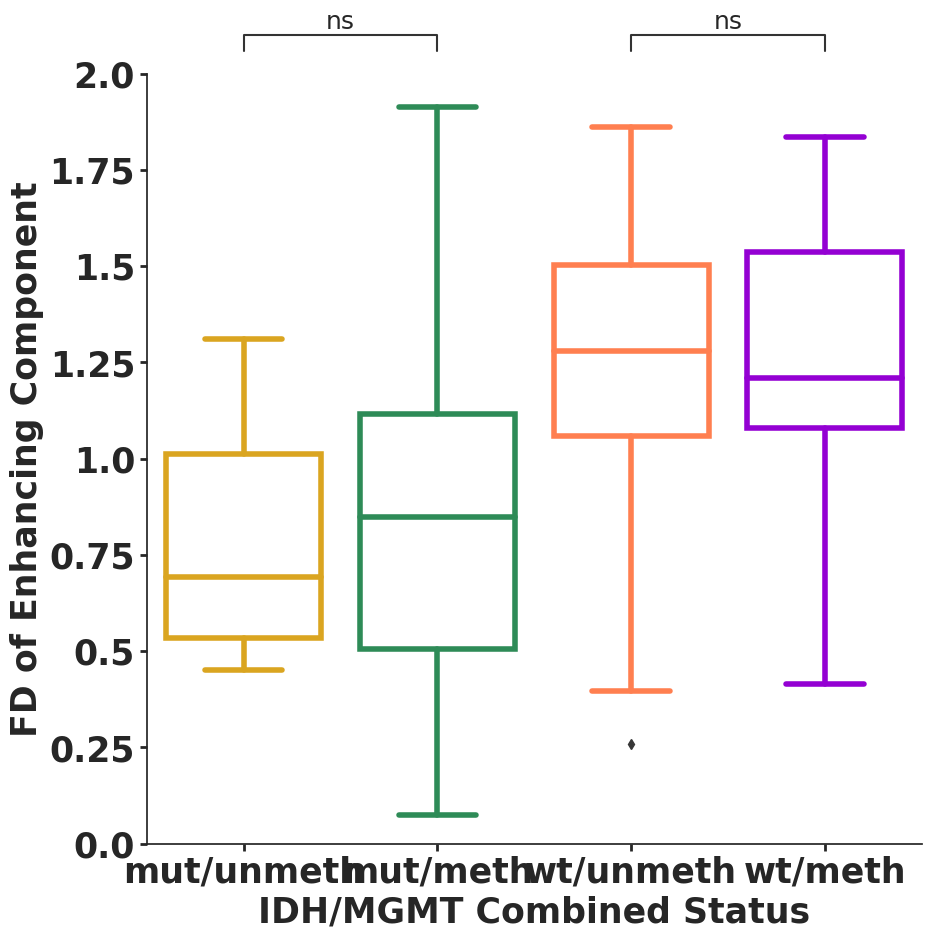

In [150]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.left'] = True

#palette = ["green","darkred"]
palette = ["goldenrod","seagreen","coral","darkviolet"]

s = sns.boxplot(x = "Combined_status", y = "et_meanfd",data = IDH_MGMT,palette = sns.color_palette(palette,4),\
                  linewidth = 4,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"])
#s.set_xlabel(s.get_xlabel(),weight = "bold")
s.set_xlabel("IDH/MGMT Combined Status", size = 25, weight = "bold")
s.set_ylabel("FD of Enhancing Component", size = 25, weight = "bold")
s.set_xticklabels(["mut/unmeth","mut/meth","wt/unmeth","wt/meth"], size = 25, fontdict = {"weight" : "bold"})
s.set_ylim([0.0,2.0])
s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})

box_patches = [patch for patch in s.patches if type(patch) == matplotlib.patches.PathPatch]
for i,box in enumerate(box_patches):
    box.set_edgecolor(palette[i])
    print(i)
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         s.lines[j].set_color(palette[i])


x1 = "Combined_status"
y1 = "et_meanfd"
order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"]
# # label_number = [np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "Low"),np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "High")]
# # label_ = []
# # for i in range(len(order)):
# #     label_.append(order[i] + " - " + str(label_number[i]) + " Scans")


# # custom = [Line2D([], [], marker = "o",color = palette[0], linestyle='None'),
# #           Line2D([], [], marker = "o", color = palette[1], linestyle='None')]
add_stat_annotation(s,data=IDH_MGMT, x=x1, y=y1,order=order, box_pairs = [("MutantUnmethylated","MutantMethylated"),("WTUnmethylated","WTMethylated")],
                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
# plt.legend(custom,label_,loc='upper right')
# s.set_title("Brain Age Gap between WMH groups in Normal Subjects",y = 1.2,size = 25, fontweight = "bold")

# plt.savefig(save_path_misc + "MGMT_Status_IDH_MGMT_ET_FD.tiff", dpi = 300, bbox_inches = 'tight')


0
1
2
3
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MutantUnmethylated v.s. MutantMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.600e+01
WTUnmethylated v.s. WTMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.780e+02


/tmp/ipykernel_161614/931091197.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


(<Axes: xlabel='IDH/MGMT Combined Status', ylabel='Lacuranity of Enhancing Component'>,
  <statannot.StatResult.StatResult at 0x7feefc77dc00>])

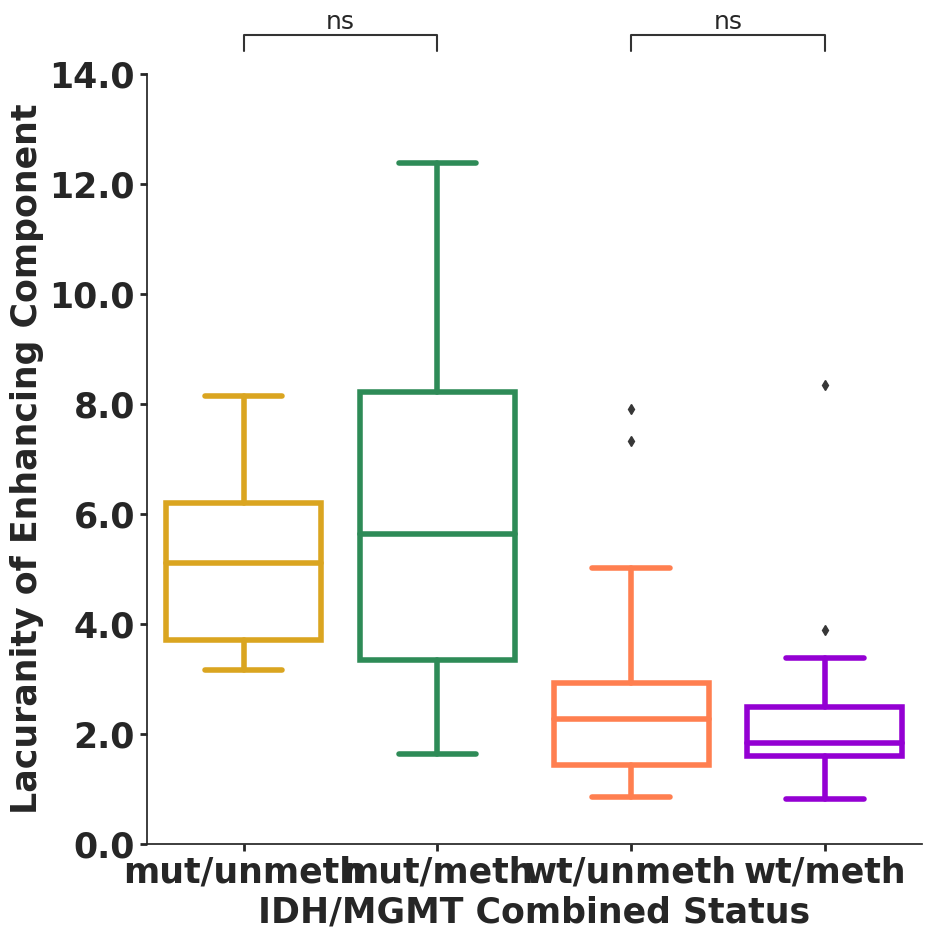

In [151]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.left'] = True

#palette = ["green","darkred"]
palette = ["goldenrod","seagreen","coral","darkviolet"]

s = sns.boxplot(x = "Combined_status", y = "et_meanlac",data = IDH_MGMT,palette = sns.color_palette(palette,4),\
                  linewidth = 4,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"])
#s.set_xlabel(s.get_xlabel(),weight = "bold")
s.set_xlabel("IDH/MGMT Combined Status", size = 25, weight = "bold")
s.set_ylabel("Lacuranity of Enhancing Component", size = 25, weight = "bold")
s.set_xticklabels(["mut/unmeth","mut/meth","wt/unmeth","wt/meth"], size = 25, fontdict = {"weight" : "bold"})
s.set_ylim([0.0,14.0])
s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})

box_patches = [patch for patch in s.patches if type(patch) == matplotlib.patches.PathPatch]
for i,box in enumerate(box_patches):
    box.set_edgecolor(palette[i])
    print(i)
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         s.lines[j].set_color(palette[i])


x1 = "Combined_status"
y1 = "et_meanlac"
order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"]
# # label_number = [np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "Low"),np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "High")]
# # label_ = []
# # for i in range(len(order)):
# #     label_.append(order[i] + " - " + str(label_number[i]) + " Scans")


# # custom = [Line2D([], [], marker = "o",color = palette[0], linestyle='None'),
# #           Line2D([], [], marker = "o", color = palette[1], linestyle='None')]
add_stat_annotation(s,data=IDH_MGMT, x=x1, y=y1,order=order, box_pairs = [("MutantUnmethylated","MutantMethylated"),("WTUnmethylated","WTMethylated")],
                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
# plt.legend(custom,label_,loc='upper right')
# s.set_title("Brain Age Gap between WMH groups in Normal Subjects",y = 1.2,size = 25, fontweight = "bold")

# plt.savefig(save_path_misc + "MGMT_Status_IDH_MGMT_ET_lac.tiff", dpi = 300, bbox_inches = 'tight')


0
1
2
3
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MutantUnmethylated v.s. MutantMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.806e-01 U_stat=1.140e+02
WTUnmethylated v.s. WTMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.537e-01 U_stat=5.560e+02


/tmp/ipykernel_161614/2123385478.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


(<Axes: xlabel='IDH/MGMT Combined Status', ylabel='FD of Edema Component'>,
  <statannot.StatResult.StatResult at 0x7feefc81da80>])

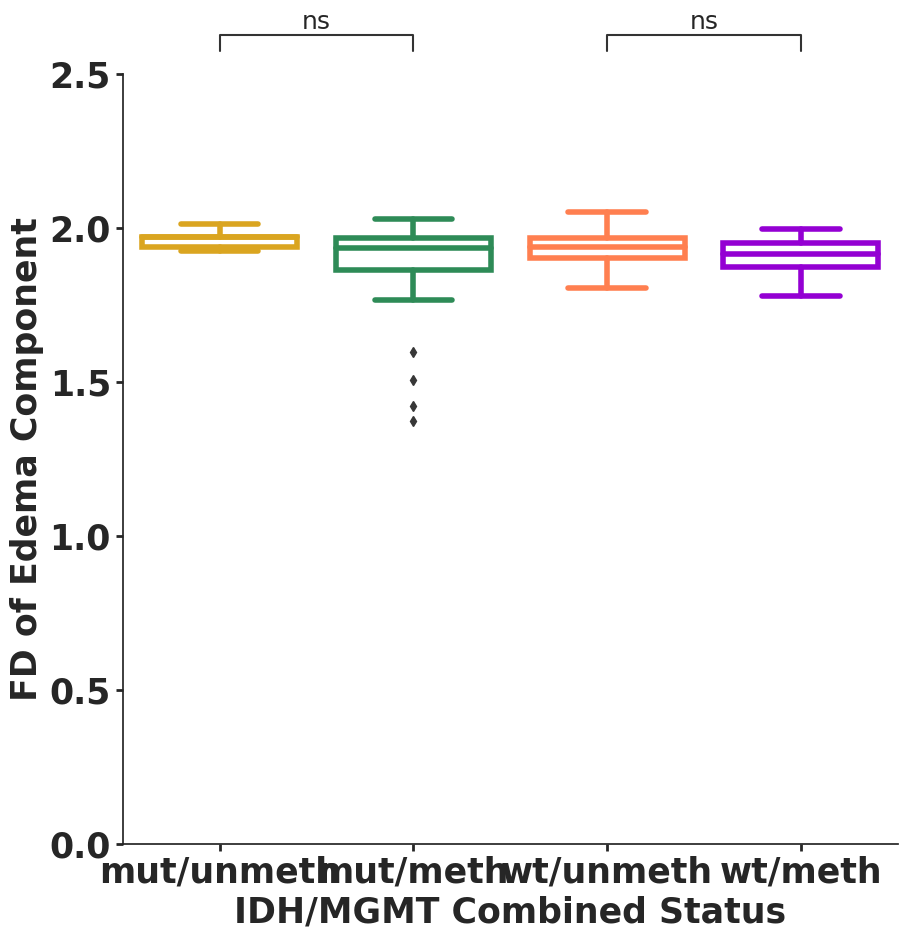

In [152]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.left'] = True

#palette = ["green","darkred"]
palette = ["goldenrod","seagreen","coral","darkviolet"]

s = sns.boxplot(x = "Combined_status", y = "ed_meanfd",data = IDH_MGMT,palette = sns.color_palette(palette,4),\
                  linewidth = 4,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"])
#s.set_xlabel(s.get_xlabel(),weight = "bold")
s.set_xlabel("IDH/MGMT Combined Status", size = 25, weight = "bold")
s.set_ylabel("FD of Edema Component", size = 25, weight = "bold")
s.set_xticklabels(["mut/unmeth","mut/meth","wt/unmeth","wt/meth"], size = 25, fontdict = {"weight" : "bold"})
s.set_ylim([0.0,2.5])
s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})

box_patches = [patch for patch in s.patches if type(patch) == matplotlib.patches.PathPatch]
for i,box in enumerate(box_patches):
    box.set_edgecolor(palette[i])
    print(i)
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         s.lines[j].set_color(palette[i])


x1 = "Combined_status"
y1 = "ed_meanfd"
order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"]
# # label_number = [np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "Low"),np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "High")]
# # label_ = []
# # for i in range(len(order)):
# #     label_.append(order[i] + " - " + str(label_number[i]) + " Scans")


# # custom = [Line2D([], [], marker = "o",color = palette[0], linestyle='None'),
# #           Line2D([], [], marker = "o", color = palette[1], linestyle='None')]
add_stat_annotation(s,data=IDH_MGMT, x=x1, y=y1,order=order, box_pairs = [("MutantUnmethylated","MutantMethylated"),("WTUnmethylated","WTMethylated")],
                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
# plt.legend(custom,label_,loc='upper right')
# s.set_title("Brain Age Gap between WMH groups in Normal Subjects",y = 1.2,size = 25, fontweight = "bold")

# plt.savefig(save_path_misc + "MGMT_Status_IDH_MGMT_ED_FD.tiff", dpi = 300, bbox_inches = 'tight')


0
1
2
3
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MutantUnmethylated v.s. MutantMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.806e-01 U_stat=4.600e+01
WTUnmethylated v.s. WTMethylated: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.220e+02


/tmp/ipykernel_161614/17676122.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


(<Axes: xlabel='IDH/MGMT Combined Status', ylabel='Lacuranity of Edema Component'>,
  <statannot.StatResult.StatResult at 0x7feefc6df010>])

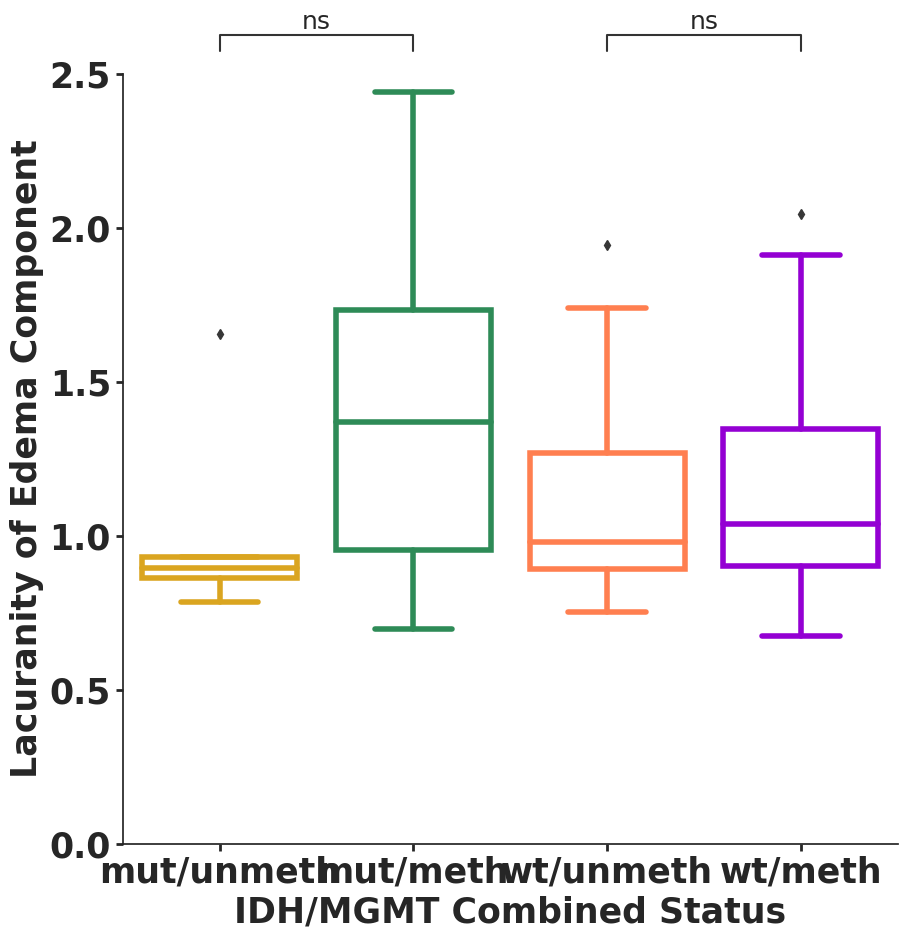

In [153]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.left'] = True

#palette = ["green","darkred"]
palette = ["goldenrod","seagreen","coral","darkviolet"]

s = sns.boxplot(x = "Combined_status", y = "ed_meanlac",data = IDH_MGMT,palette = sns.color_palette(palette,4),\
                  linewidth = 4,order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"])
#s.set_xlabel(s.get_xlabel(),weight = "bold")
s.set_xlabel("IDH/MGMT Combined Status", size = 25, weight = "bold")
s.set_ylabel("Lacuranity of Edema Component", size = 25, weight = "bold")
s.set_xticklabels(["mut/unmeth","mut/meth","wt/unmeth","wt/meth"], size = 25, fontdict = {"weight" : "bold"})
s.set_ylim([0.0,2.5])
s.set_yticklabels(s.get_yticks(), size = 25, fontdict = {"weight" : "bold"})

box_patches = [patch for patch in s.patches if type(patch) == matplotlib.patches.PathPatch]
for i,box in enumerate(box_patches):
    box.set_edgecolor(palette[i])
    print(i)
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         s.lines[j].set_color(palette[i])


x1 = "Combined_status"
y1 = "ed_meanlac"
order = ["MutantUnmethylated","MutantMethylated","WTUnmethylated","WTMethylated"]
# # label_number = [np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "Low"),np.count_nonzero(compare_df_CN_WMH["WMH Level"] == "High")]
# # label_ = []
# # for i in range(len(order)):
# #     label_.append(order[i] + " - " + str(label_number[i]) + " Scans")


# # custom = [Line2D([], [], marker = "o",color = palette[0], linestyle='None'),
# #           Line2D([], [], marker = "o", color = palette[1], linestyle='None')]
add_stat_annotation(s,data=IDH_MGMT, x=x1, y=y1,order=order, box_pairs = [("MutantUnmethylated","MutantMethylated"),("WTUnmethylated","WTMethylated")],
                      test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
# plt.legend(custom,label_,loc='upper right')
# s.set_title("Brain Age Gap between WMH groups in Normal Subjects",y = 1.2,size = 25, fontweight = "bold")

# plt.savefig(save_path_misc + "MGMT_Status_IDH_MGMT_ED_lac.tiff", dpi = 300, bbox_inches = 'tight')


In [154]:
model = ols('ncr_net_meanfd ~ C(IDH_status) + C(MGMT_promoter_status) + C(IDH_status):C(MGMT_promoter_status)',
            data=glioma).fit()
result = sm.stats.anova_lm(model, type=3)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(IDH_status),1.0,2.192335,2.192335,18.342881,0.000045
C(MGMT_promoter_status),1.0,0.343196,0.343196,2.871462,0.093509
C(IDH_status):C(MGMT_promoter_status),1.0,0.210938,0.210938,1.764880,0.187268
Residual,93.0,11.115327,0.119520,NaN,NaN


In [155]:
model = ols('ncr_net_meanlac ~ C(IDH_status) + C(MGMT_promoter_status) + C(IDH_status):C(MGMT_promoter_status)',
            data=glioma).fit()
result = sm.stats.anova_lm(model, type=3)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(IDH_status),1.0,38.155982,38.155982,16.047085,0.000124
C(MGMT_promoter_status),1.0,1.718615,1.718615,0.722790,0.397414
C(IDH_status):C(MGMT_promoter_status),1.0,4.096497,4.096497,1.722845,0.192557
Residual,93.0,221.130900,2.377752,NaN,NaN


In [156]:
model = ols('et_meanfd ~ C(IDH_status) + C(MGMT_promoter_status) + C(IDH_status):C(MGMT_promoter_status)',
            data=glioma).fit()
result = sm.stats.anova_lm(model, type=3)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(IDH_status),1.0,3.689949,3.689949,23.916491,0.000004
C(MGMT_promoter_status),1.0,0.041831,0.041831,0.271131,0.603812
C(IDH_status):C(MGMT_promoter_status),1.0,0.000682,0.000682,0.004422,0.947123
Residual,93.0,14.348480,0.154285,NaN,NaN


In [157]:
model = ols('et_meanlac ~ C(IDH_status) + C(MGMT_promoter_status) + C(IDH_status):C(MGMT_promoter_status)',
            data=glioma).fit()
result = sm.stats.anova_lm(model, type=3)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(IDH_status),1.0,265.889489,265.889489,50.510939,2.368829e-10
C(MGMT_promoter_status),1.0,0.076051,0.076051,0.014447,9.045864e-01
C(IDH_status):C(MGMT_promoter_status),1.0,3.215645,3.215645,0.610875,4.364438e-01
Residual,93.0,489.551831,5.263998,NaN,NaN


In [158]:
model = ols('ed_meanfd ~ C(IDH_status) + C(MGMT_promoter_status) + C(IDH_status):C(MGMT_promoter_status)',
            data=glioma).fit()
result = sm.stats.anova_lm(model, type=3)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(IDH_status),1.0,0.029240,0.029240,2.601377,0.110159
C(MGMT_promoter_status),1.0,0.032732,0.032732,2.912092,0.091255
C(IDH_status):C(MGMT_promoter_status),1.0,0.015714,0.015714,1.398042,0.240066
Residual,93.0,1.045334,0.011240,NaN,NaN


In [159]:
model = ols('ed_meanlac ~ C(IDH_status) + C(MGMT_promoter_status) + C(IDH_status):C(MGMT_promoter_status)',
            data=glioma).fit()
result = sm.stats.anova_lm(model, type=3)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(IDH_status),1.0,18.353360,18.353360,4.073359,0.046445
C(MGMT_promoter_status),1.0,1.334633,1.334633,0.296209,0.587571
C(IDH_status):C(MGMT_promoter_status),1.0,4.695923,4.695923,1.042217,0.309955
Residual,93.0,419.030727,4.505707,NaN,NaN


In [160]:
cols = ["ncr_net_meanfd","et_meanfd","IDH_status","MGMT_promoter_status","Survival_months","Vital_status_1_dead"]
glioma_nonan = glioma[cols].dropna()

In [161]:
cols = ["ncr_net_meanfd","et_meanfd","Survival_months","Vital_status_1_dead"]
cox_1 = glioma_nonan[cols]
cox_1.head()

,ncr_net_meanfd,et_meanfd,Survival_months,Vital_status_1_dead
0,1.205159,0.451926,43.861292,1.0
2,1.234522,0.494171,40.148688,0.0
3,1.786692,1.786606,9.955035,0.0
5,0.928382,0.774993,17.675936,1.0
6,0.439656,0.397565,23.819803,0.0


In [162]:
cph = CoxPHFitter()
cph.fit(cox_1,"Survival_months",event_col = "Vital_status_1_dead")
cph.print_summary()

NameError: name 'CoxPHFitter' is not defined

In [ ]:
cols = ["ncr_net_meanfd","et_meanfd","IDH_status","MGMT_promoter_status","Survival_months","Vital_status_1_dead"]
cox_2 = glioma_nonan[cols]
cox_2.loc[glioma_nonan["IDH_status"] == "WT","IDH_status"] = 1
cox_2.loc[glioma_nonan["IDH_status"] == "Mutant","IDH_status"] = 0
cox_2.loc[glioma_nonan["MGMT_promoter_status"] == "Unmethylated","MGMT_promoter_status"] = 1
cox_2.loc[glioma_nonan["MGMT_promoter_status"] == "Methylated","MGMT_promoter_status"] = 0
cox_2.head()

In [ ]:
cph = CoxPHFitter()
cph.fit(cox_2,"Survival_months",event_col = "Vital_status_1_dead")
cph.print_summary()

### Density Plots of Total IDH Population

Net Median: 1.212231066


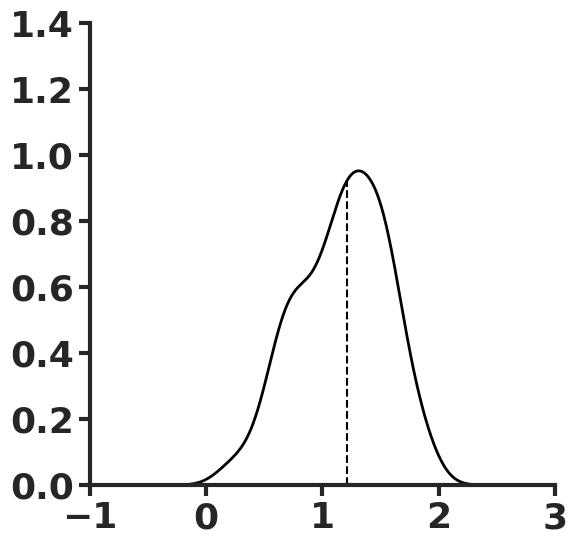

In [51]:
# x="Fractal Dimension of Necrosis fraction", y= density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.ncr_net_meanfd.plot.density(color = "black",linewidth=2)
plt.vlines(net_median,0.0,0.92,linestyles = "dashed",colors = "black")
plt.xlabel('',fontsize = 20, fontweight = "bold")
plt.ylabel('',fontsize = 20, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,1.4])
plt.xlim(-1,3)
print("Net Median:",net_median)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density_of_NET_FD.tiff",bbox_inches = "tight",dpi = 300)

Net Median: 2.34576596


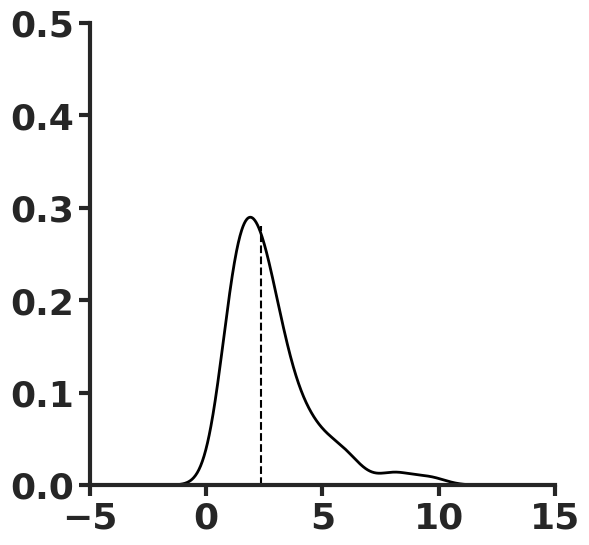

In [52]:
#xlabel= Lacuranity of Necrosis fraction, ylabel= density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.ncr_net_meanlac.plot.density(color = "black",linewidth=2)
net_median_lac = np.median(glioma["ncr_net_meanlac"].values)
plt.vlines(net_median_lac,0.0,0.28,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 20, fontweight = "bold")
plt.ylabel("",fontsize = 20, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim(-5,15)
print("Net Median:",net_median_lac)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of NET_lac.tiff",bbox_inches = "tight",dpi = 300)

ET Median: 1.186251717


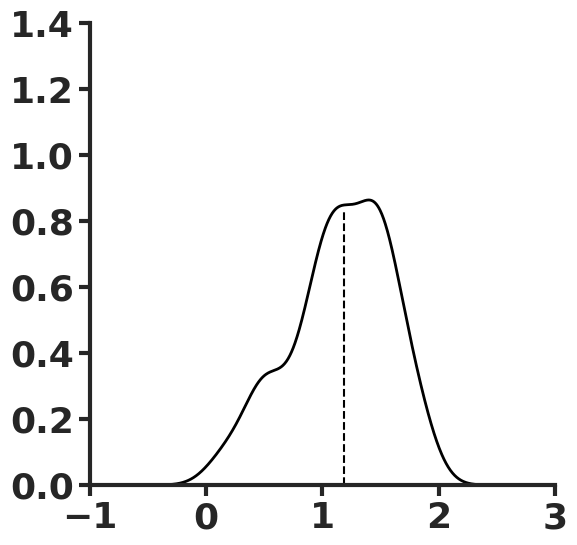

In [53]:
# xlable= Fractal Dimension of Enhancing fraction, ylable=DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.et_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(et_median,0.0,0.83,linestyles = "dashed",colors = "black")
plt.xlabel('',fontsize = 20, fontweight = "bold")
plt.ylabel('',fontsize = 20, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,1.4])
plt.xlim(-1,3)
print("ET Median:",et_median)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ET_FD.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 2.319369973


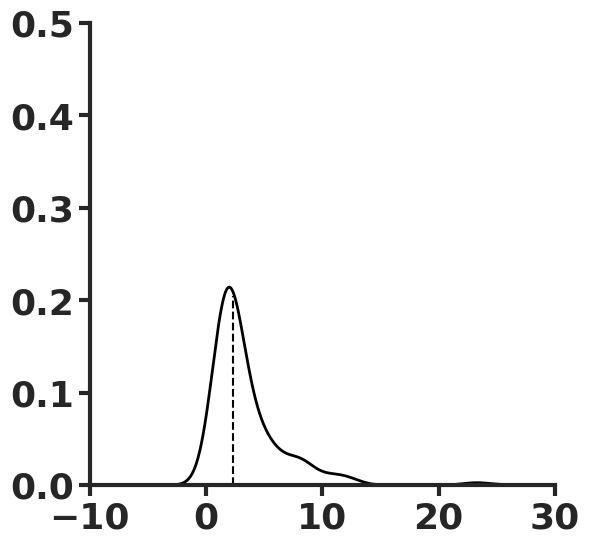

In [54]:
# xlable=Lacuranity of Enhancing fraction , ylable=Density

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.et_meanlac.plot.density(color = "black",linewidth=2)
et_median_lac = np.median(glioma["et_meanlac"].values)
plt.vlines(et_median_lac,0.0,0.205,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 20, fontweight = "bold")
plt.ylabel("",fontsize = 20, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim([-10,30])
print("ET Median:",et_median_lac)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ET_lac.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.931213087


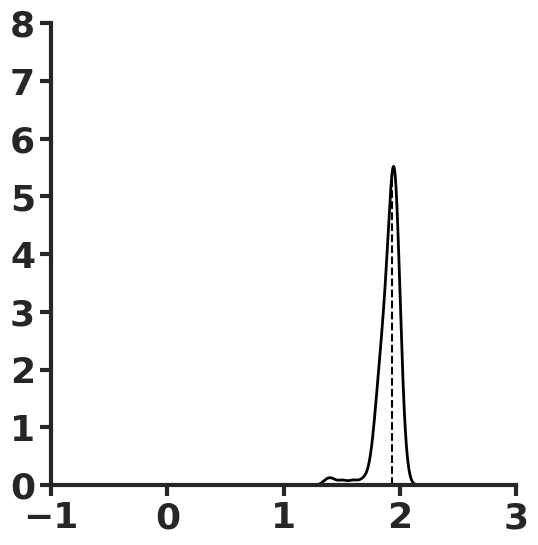

In [55]:
# "Fractal Dimension of Edema fraction", y label = Density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.ed_meanfd.plot.kde(color = "black",linewidth=2)
plt.vlines(ed_median,0.0,5.3,linestyles = "dashed",colors = "black")
plt.xlabel('',fontsize = 20, fontweight = "bold")
plt.ylabel('',fontsize = 20, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,8])
plt.xlim(-1,3)

print("ED Median:",ed_median)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ED_FD.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.093856575


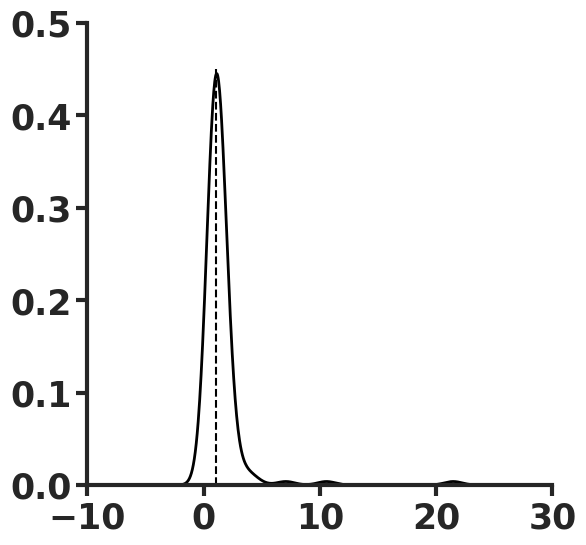

In [56]:
#"Lacunarity of Edema fraction", y label = Density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.ed_meanlac.plot.density(color = "black", linewidth=2)
ed_median_lac = np.median(glioma["ed_meanlac"].values)
plt.vlines(ed_median_lac,0.0,0.45,linestyles = "dashed",colors = "black")
# plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 25,weight = "bold")
plt.yticks(size = 25,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim(-10,30)
print("ED Median:",ed_median_lac)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ED_lac.tiff",dpi = 300,bbox_inches = "tight")

In [57]:
net_high_low = []
ed_high_low = []
et_high_low = []
for i in range(len(glioma)):
    if glioma["ncr_net_meanfd"].values[i] <= net_median:
        net_high_low.append(0)
    else:
        net_high_low.append(1)
    
    if glioma["et_meanfd"].values[i] <= et_median:
        et_high_low.append(0)
    else:
        et_high_low.append(1)
        
    if glioma["ed_meanfd"].values[i] <= ed_median:
        ed_high_low.append(0)
    else:
        ed_high_low.append(1)
    
glioma["net_high_low"] = net_high_low
glioma["et_high_low"] = et_high_low
glioma["ed_high_low"] = ed_high_low
glioma.head()


,Histology_x,Survival_months,Vital_status_1_dead,ncr_net_meanfd,ncr_net_medfd,ed_meanfd,ed_medfd,et_meanfd,et_medfd,ncr_net_meanlac,...,mean_lac,med_lac,mean_fd,med_fd,IDH_status,MGMT_promoter_status,TERT_promoter_status,net_high_low,et_high_low,ed_high_low
0,astrocytoma,43.861292,1.0,1.205159,1.713785,1.969199,2.080206,0.451926,0.000000,1.172377,...,0.780359,0.611278,1.884747,1.899495,Mutant,Unmethylated,WT,0,0,1
2,astrocytoma,40.148688,0.0,1.234522,1.728472,1.997939,2.089761,0.494171,0.000000,1.240165,...,0.581125,0.501539,1.951786,1.991057,Mutant,Methylated,WT,1,0,1
3,oligodendroglioma,9.955035,0.0,1.786692,2.189413,1.421227,1.606810,1.786606,2.155184,1.536610,...,1.230620,1.214054,1.888397,1.900201,Mutant,Methylated,Mutant,1,1,0
5,oligoastrocytoma,17.675936,1.0,0.928382,1.200000,1.949550,1.989812,0.774993,0.000000,4.499352,...,0.946652,0.854061,1.952394,1.977071,WT,Unmethylated,Mutant,0,0,1
6,astrocytoma,23.819803,0.0,0.439656,0.000000,1.822573,1.884382,0.397565,0.000000,3.244222,...,1.260947,1.084894,1.815599,1.859694,WT,Unmethylated,Mutant,0,0,0


In [58]:
IDH_WT = glioma[glioma["IDH_status"] == "WT"]
IDH_WT.head()

,Histology_x,Survival_months,Vital_status_1_dead,ncr_net_meanfd,ncr_net_medfd,ed_meanfd,ed_medfd,et_meanfd,et_medfd,ncr_net_meanlac,...,mean_lac,med_lac,mean_fd,med_fd,IDH_status,MGMT_promoter_status,TERT_promoter_status,net_high_low,et_high_low,ed_high_low
5,oligoastrocytoma,17.675936,1.0,0.928382,1.200000,1.949550,1.989812,0.774993,0.000000,4.499352,...,0.946652,0.854061,1.952394,1.977071,WT,Unmethylated,Mutant,0,0,1
6,astrocytoma,23.819803,0.0,0.439656,0.000000,1.822573,1.884382,0.397565,0.000000,3.244222,...,1.260947,1.084894,1.815599,1.859694,WT,Unmethylated,Mutant,0,0,0
12,astrocytoma,8.443709,0.0,0.205425,0.000000,1.954780,1.983710,1.177245,1.636960,6.017913,...,0.832933,0.754625,1.870465,1.905534,WT,Unmethylated,Mutant,0,0,1
16,oligodendroglioma,133.653733,1.0,0.656865,0.000000,1.908964,2.051069,1.521280,1.850283,2.813835,...,0.592930,0.513663,1.855543,1.891951,WT,Unmethylated,WT,0,1,0
40,oligodendroglioma,4.961090,0.0,1.378079,1.862337,1.969787,2.085460,0.415685,0.000000,2.517112,...,1.070147,0.758712,1.919522,1.957846,WT,Methylated,Mutant,1,0,1


In [59]:
IDH_Mutant = glioma[glioma["IDH_status"] == "Mutant"]
IDH_Mutant.head()

,Histology_x,Survival_months,Vital_status_1_dead,ncr_net_meanfd,ncr_net_medfd,ed_meanfd,ed_medfd,et_meanfd,et_medfd,ncr_net_meanlac,...,mean_lac,med_lac,mean_fd,med_fd,IDH_status,MGMT_promoter_status,TERT_promoter_status,net_high_low,et_high_low,ed_high_low
0,astrocytoma,43.861292,1.0,1.205159,1.713785,1.969199,2.080206,0.451926,0.000000,1.172377,...,0.780359,0.611278,1.884747,1.899495,Mutant,Unmethylated,WT,0,0,1
2,astrocytoma,40.148688,0.0,1.234522,1.728472,1.997939,2.089761,0.494171,0.000000,1.240165,...,0.581125,0.501539,1.951786,1.991057,Mutant,Methylated,WT,1,0,1
3,oligodendroglioma,9.955035,0.0,1.786692,2.189413,1.421227,1.606810,1.786606,2.155184,1.536610,...,1.230620,1.214054,1.888397,1.900201,Mutant,Methylated,Mutant,1,1,0
9,oligodendroglioma,8.016596,0.0,0.314880,0.000000,1.825175,1.898815,0.466425,0.000000,9.321535,...,0.923250,0.974045,1.849288,1.891761,Mutant,Methylated,Mutant,0,0,0
11,oligoastrocytoma,17.445952,0.0,0.825249,0.000000,1.969426,1.969212,0.693790,0.000000,3.184147,...,0.794325,0.732109,1.925800,1.943131,Mutant,Unmethylated,WT,0,0,1


### Density plots of FD and Lac of IDH mutant and WT status

Net Median: 1.128704535


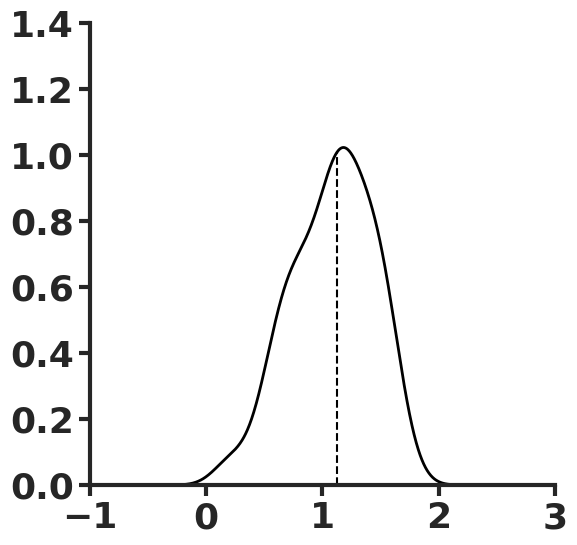

In [60]:
# WILDTYPE, Fractal Dimension of Necrosis fraction, DENSITY

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
net_median_WT = np.median(IDH_WT["ncr_net_meanfd"].values)
IDH_WT.ncr_net_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(net_median_WT,0.0,1.01,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.title("",fontsize = 30,fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0,1.4])
plt.xlim([-1,3])
print("Net Median:",net_median_WT)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of NET_WILDTYPE_FD.tiff",dpi = 300,bbox_inches = "tight")

Net Median: 2.684827851


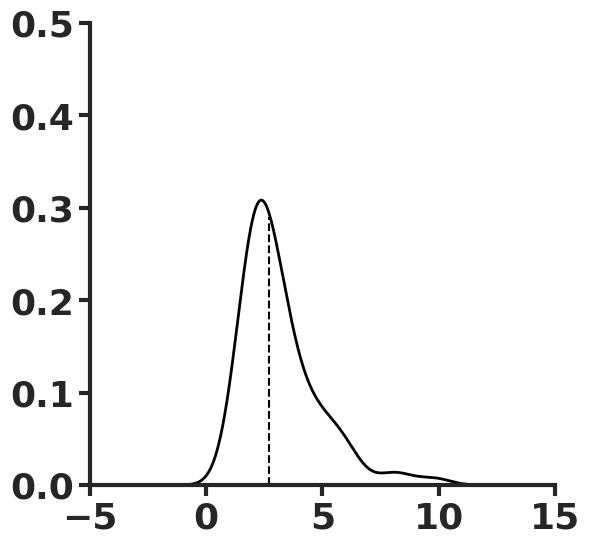

In [61]:
# WILDTYPE,  Lacuranity of Necrosis fraction, DENSITY

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
net_median_WT = np.median(IDH_WT["ncr_net_meanlac"].values)
IDH_WT.ncr_net_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(net_median_WT,0.0,0.29,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.title("",fontsize = 30,fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim(-5, 15)
print("Net Median:",net_median_WT)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of NET_WILDTYPE_lac.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 1.328773119


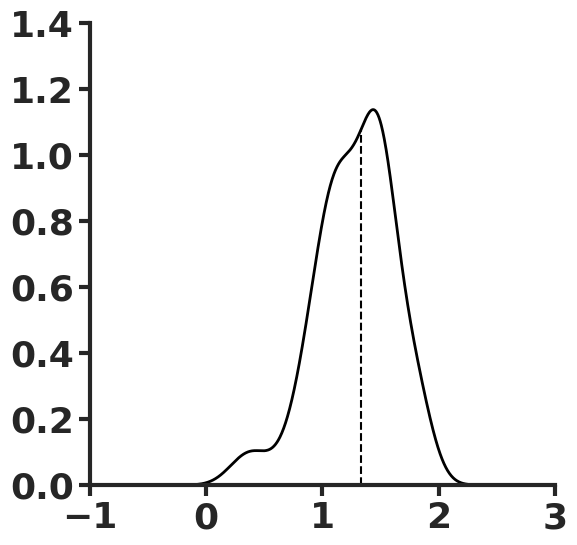

In [62]:
# WILDTYPE, Fractal Dimension of Enhancing fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
et_median_WT = np.median(IDH_WT["et_meanfd"].values)
IDH_WT.et_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_WT,0.0,1.08,linestyles = "dashed",colors = "black")
plt.title("",fontsize = 30,fontweight = "bold")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,1.4])
plt.xlim([-1,3])
print("ET Median:",et_median_WT)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ET_WILDTYPE_FD.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 1.96129401


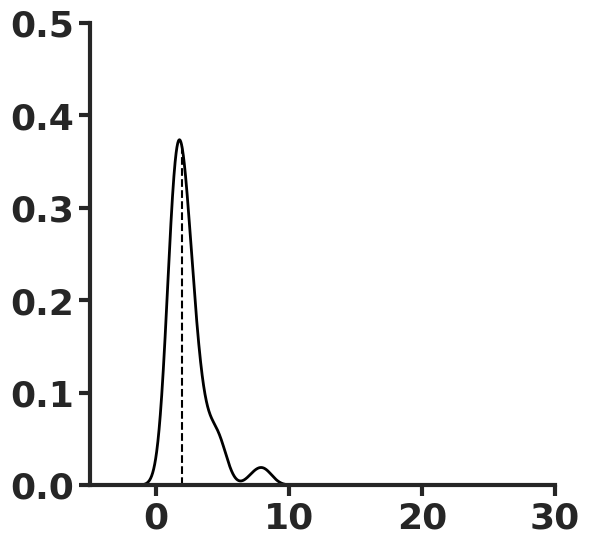

In [63]:
# WILDTYPE, Lacuranity of Enhancing fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
et_median_WT = np.median(IDH_WT["et_meanlac"].values)
IDH_WT.et_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_WT,0.0,0.37,linestyles = "dashed",colors = "black")
plt.title("",fontsize = 30,fontweight = "bold")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim([-5,30])
print("ET Median:",et_median_WT)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ET_WILDTYPE_lac.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.92153552


(-1.0, 3.0)

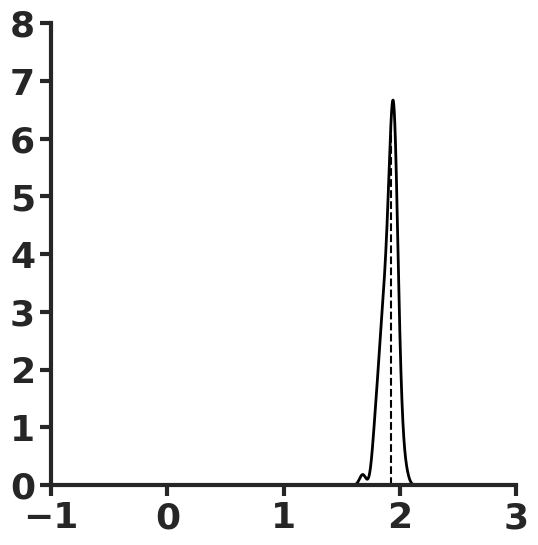

In [64]:
# WILDTYPE, Fractal Dimension of Edema fraction DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
ed_median_WT = np.median(IDH_WT["ed_meanfd"].values)
IDH_WT.ed_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(ed_median_WT,0.0,6.2,linestyles = "dashed",colors = "black")
plt.title("",fontsize = 30,fontweight = "bold")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
print("ED Median:",ed_median_WT)
plt.ylim([0.0,8.0])
plt.xlim(-1, 3)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ED_WILDTYPE_FD.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.072476209


(-5.0, 30.0)

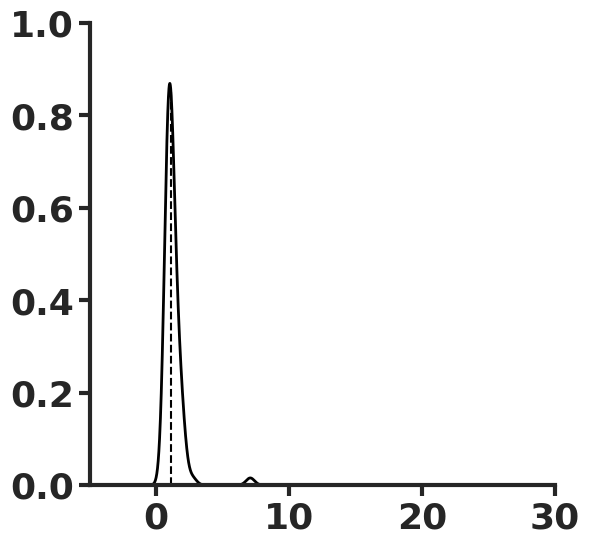

In [65]:
# WILDTYPE, Lacuranity of Edema fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
ed_median_WT = np.median(IDH_WT["ed_meanlac"].values)
IDH_WT.ed_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(ed_median_WT,0.0,0.85,linestyles = "dashed",colors = "black")
plt.title("",fontsize = 30,fontweight = "bold")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
print("ED Median:",ed_median_WT)
plt.ylim([0.0,1.0])
plt.xlim([-5 ,30])
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ED_WILDTYPE_lac.tiff",dpi = 300,bbox_inches = "tight")

NET Median: 1.528658203


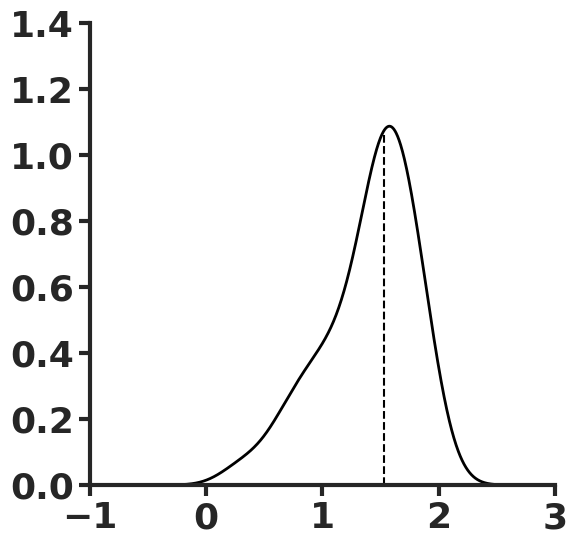

In [66]:
# MUTANT, Fractal Dimension of Necrosis fraction, DENSITY

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
net_median_Mutant = np.median(IDH_Mutant["ncr_net_meanfd"].values)
IDH_Mutant.ncr_net_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(net_median_Mutant,0.0,1.07,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.title("",fontsize = 30,fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,1.4])
plt.xlim(-1, 3)
print("NET Median:",net_median_Mutant)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of NET_MUTANT_FD.tiff",dpi = 300,bbox_inches = "tight")

NET Median: 1.304538483


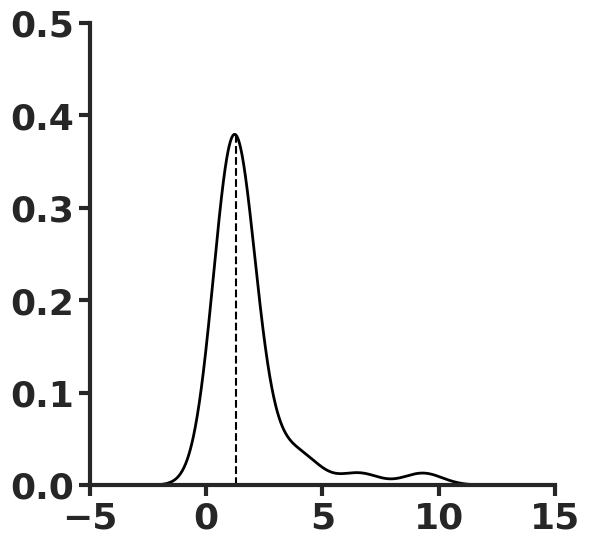

In [67]:
# MUTANT, Lacuranity of Necrosis fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
net_median_Mutant = np.median(IDH_Mutant["ncr_net_meanlac"].values)
IDH_Mutant.ncr_net_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(net_median_Mutant,0.0,0.38,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.title("",fontsize = 30,fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim(-5, 15)
print("NET Median:",net_median_Mutant)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of NET_MUTANT_lac.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 0.802430168


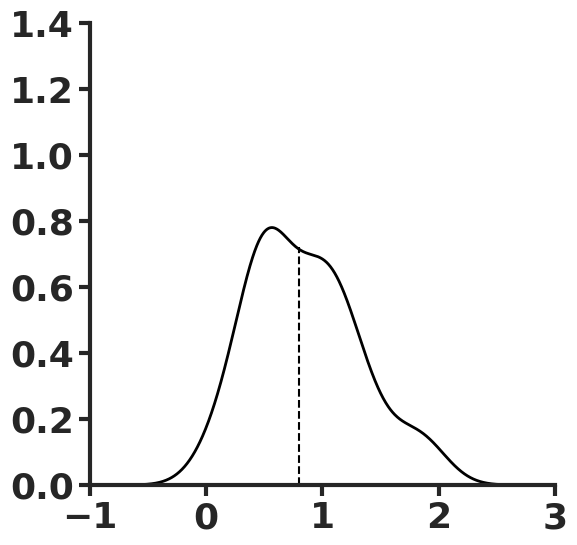

In [68]:
# MUTANT, Fractal Dimension of Enhancing fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
et_median_Mutant = np.median(IDH_Mutant["et_meanfd"].values)
IDH_Mutant.et_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_Mutant,0.0,0.72,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.title("",fontsize = 30,fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,1.4])
plt.xlim(-1, 3)
print("ET Median:",et_median_Mutant)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ET_Mutant_FD.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 5.446708609


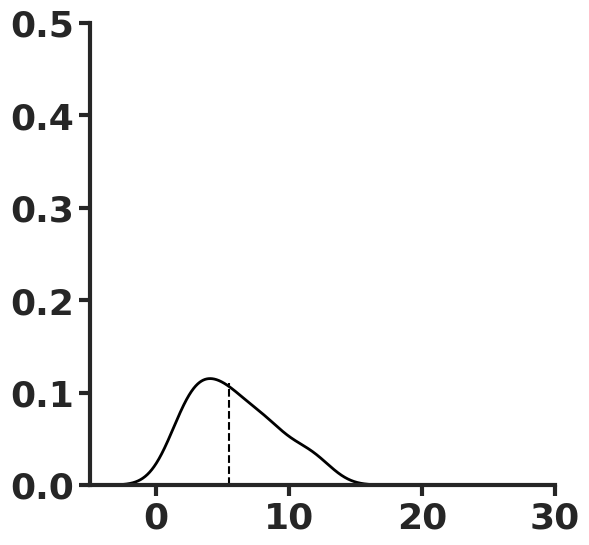

In [69]:
# MUTANT, Lacuranity of Enhancing fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
et_median_Mutant = np.median(IDH_Mutant["et_meanlac"].values)
IDH_Mutant.et_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_Mutant,0.0,0.11,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.title("",fontsize = 30,fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim([-5,30])
print("ET Median:",et_median_Mutant)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ET_Mutant_lac.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.935415678


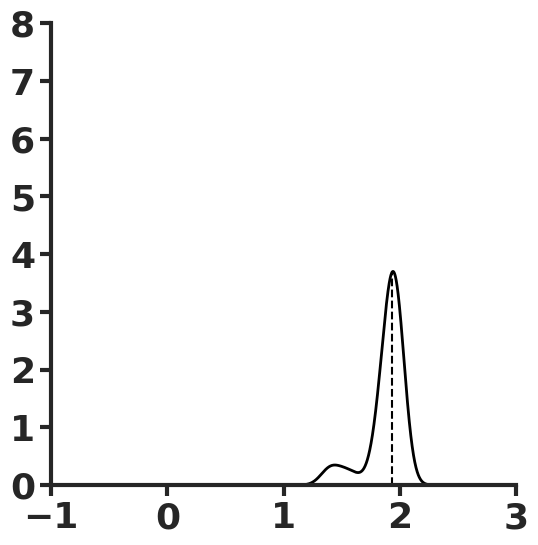

In [70]:
# MUTANT, Fractal Dimension of Edema fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
ed_median_Mutant = np.median(IDH_Mutant["ed_meanfd"].values)
IDH_Mutant.ed_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(ed_median_Mutant,0.0,3.7,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.title("",fontsize = 30,fontweight = "bold")
plt.ylabel("",fontsize = 30,fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,8])
plt.xlim(-1,3)
print("ED Median:",ed_median_Mutant)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ED_Mutant_FD.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.352999267


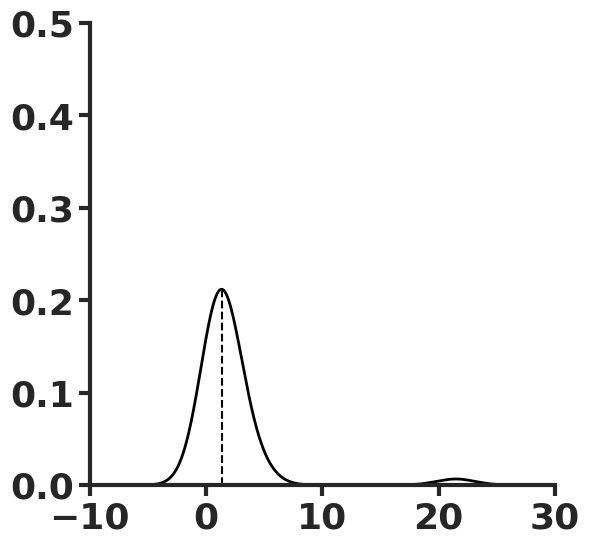

In [71]:
# MUTANT, Lacuranity of Edema fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
ed_median_Mutant = np.median(IDH_Mutant["ed_meanlac"].values)
IDH_Mutant.ed_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(ed_median_Mutant,0.0,0.21,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.title("",fontsize = 30,fontweight = "bold")
plt.ylabel("",fontsize = 30,fontweight = "bold")
plt.xticks(size = 26,weight = "bold")
plt.yticks(size = 26,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim(-10, 30)
print("ED Median:",ed_median_Mutant)
# #plt.savefig("/home/aswin/project/brain/Fractal_dimension_tumour_paper_main/Density_plots/Density of ED_Mutant_lac.tiff",dpi = 300,bbox_inches = "tight")